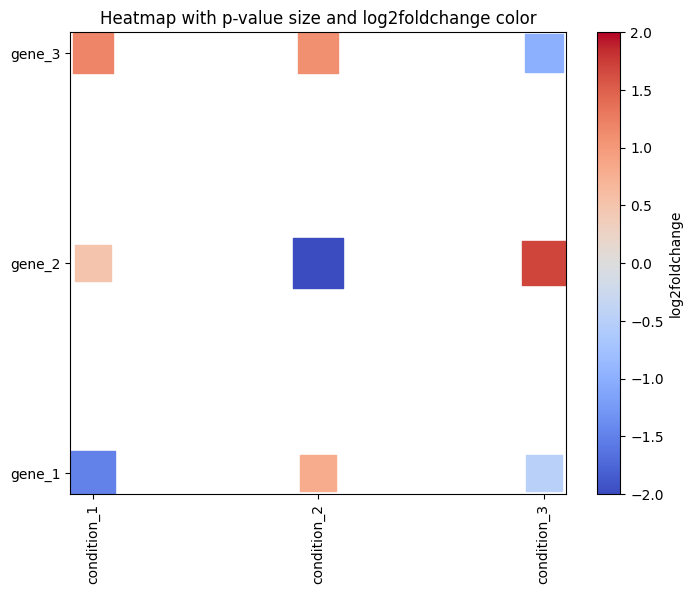

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据
data = {
    'condition_1': [-1.5, 0.5, 1.2],
    'condition_2': [0.8, -2.3, 1.1],
    'condition_3': [-0.5, 1.7, -1.0]
}

p_values = {
    'condition_1': [0.01, 0.05, 0.02],
    'condition_2': [0.04, 0.003, 0.02],
    'condition_3': [0.05, 0.01, 0.03]
}

log2fc = pd.DataFrame(data, index=['gene_1', 'gene_2', 'gene_3'])
p_values_df = pd.DataFrame(p_values, index=['gene_1', 'gene_2', 'gene_3'])

# 绘制热图，使用白色背景
fig, ax = plt.subplots(figsize=(8, 6))

# 背景设置为白色
ax.set_facecolor('white')

# 使用循环为每个格子绘制方形点，颜色表示log2foldchange，大小表示p值
for i in range(log2fc.shape[0]):
    for j in range(log2fc.shape[1]):
        # 获取 log2foldchange 值
        log2fc_value = log2fc.iloc[i, j]
        # 获取 p 值
        p_value = p_values_df.iloc[i, j]
        
        # 计算方形大小，p值越小方形越大
        size = -np.log10(p_value) * 500  # 调整系数以控制大小
        # 颜色映射，颜色越大越红，越小越蓝
        color = plt.cm.coolwarm((log2fc_value + 2) / 4)  # 调整log2fc的范围映射到 [0, 1]
        
        # 在格子上绘制方形
        ax.scatter(j, i, s=size, color=color, marker='s')

# 设置 x 轴和 y 轴标签
ax.set_xticks(np.arange(log2fc.shape[1]))
ax.set_xticklabels(log2fc.columns, rotation=90)
ax.set_yticks(np.arange(log2fc.shape[0]))
ax.set_yticklabels(log2fc.index)

# 添加颜色条，表示 log2foldchange 的变化
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=-2, vmax=2))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("log2foldchange")

plt.title("Heatmap with p-value size and log2foldchange color")
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr
from scipy.stats import pearsonr

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/tmp/ipykernel_76862/2379997049.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p_matrix = p_matrix.applymap(lambda x: '**')


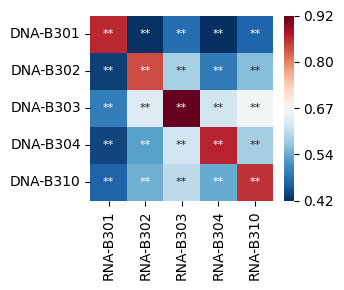

In [18]:
data = pd.read_csv('./tumor_1520_5_replicates.txt', header=0, sep='\t')

DNA = data.loc[:, ['DNA-B301', 'DNA-B302', 'DNA-B303', 'DNA-B304', 'DNA-B310']]
RNA = data.loc[:, ['RNA-B301', 'RNA-B302', 'RNA-B303', 'RNA-B304', 'RNA-B310']]

DNA = np.log2(DNA)
RNA = np.log2(RNA)

DNA = DNA.dropna()
RNA = RNA.dropna()

plt.figure(figsize=(3.5, 3))
p_matrix = np.zeros((5, 5))
r_matrix = np.zeros((5, 5))
# _, axs = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        r = spearmanr(DNA.iloc[:, i], RNA.iloc[:, j])
        r_matrix[i, j] = r.statistic
        p_matrix[i, j] = r.pvalue

        # 根据对角线设置颜色
        # color = 'red' if i == j else 'gray'
        # ax.scatter(RNA.iloc[:, i], DNA.iloc[:, j], s=10, edgecolor='none', alpha=0.8, color=color)
        
        # ax.text(0.05, 0.95, f'Spearman r: {r[0]:.4f}\np-value < 1e{(np.log10(r[1]) if r[1] > 0 else -32):.0f}', 
        #    transform=ax.transAxes, ha='left', va='top', fontsize=10)
        # sns.regplot(x=RNA.iloc[:, i], y=DNA.iloc[:, j], scatter=False, ax=ax, color='black', line_kws={"alpha": 0.6, "linewidth": 0.8})
        
        # 去除边框，只显示左边和下边的标签
        # ax.spines['top'].set_visible(False)
        # ax.spines['right'].set_visible(False)
        
        # 统一设置xticks和yticks
        # if i != 4:  # 最后一行显示x轴标签
            # ax.set_xticklabels([])  # 其他行不显示x轴标签
        # else:
            # ax.set_xlabel(DNA.columns[i])

        # if j != 0:  # 第一列显示y轴标签
            # ax.set_yticklabels([])  # 其他列不显示y轴标签
        # ax.set_ylabel('')
r_matrix = pd.DataFrame(r_matrix, index=DNA.columns, columns=RNA.columns)
p_matrix = pd.DataFrame(p_matrix, index=DNA.columns, columns=RNA.columns)
p_matrix = p_matrix.applymap(lambda x: '**')
ax = sns.heatmap(r_matrix, annot=p_matrix, fmt='s', cmap='RdBu_r', annot_kws={'size': 8}, cbar=True)
cbar = ax.collections[0].colorbar
cbar.set_ticks(np.linspace(np.min(r_matrix), np.max(r_matrix), 5))  # 设置从0到1的5个刻度
cbar.set_ticklabels([f'{tick:.2f}' for tick in np.linspace(np.min(r_matrix), np.max(r_matrix), 5)])  # 设置刻度标签


plt.tight_layout()

plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/DNA_RNA_all_samples.pdf", format="pdf", bbox_inches='tight')
plt.show()

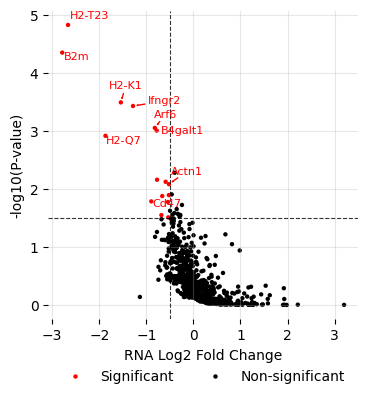

In [2]:
data = pd.read_csv('./5_mice_RNA.gene_summary.txt', header=0, sep='\t')
# data['-log10(p-value)'] = -np.log10([row['pos|p-value'] if row['pos|lfc'] > 0 else row['neg|p-value'] for _, row in data.iterrows()])
data['-log10(p-value)'] = -np.log10(data['neg|p-value'])
data['l2fc'] = data['pos|lfc']
data['sig'] = (data['-log10(p-value)'] > 1.5) & (data['l2fc'] < -0.5)
data['sig'] = data['sig'].map({True: 'Significant', False: 'Non-significant'})

plt.figure(figsize=(4, 4))  # 创建新图形
# plt.gca().add_patch(plt.Rectangle((-0.6, -0.1), 1.2, 3, fill=False, edgecolor='black', linewidth=1))  # 添加外框
scatter = sns.scatterplot(x='l2fc', y='-log10(p-value)', data=data, hue='sig', palette=['red', 'black'], edgecolor='none', s=10)
# scatter = sns.scatterplot(x='l2fc', y='log10(p-value)', data=data, hue='sig', palette=['black', 'red'], edgecolor='none', s=10)
plt.axvline(x=-0.5, color='black', linestyle='--', linewidth=0.8, alpha=0.8)  # 添加x=-0.5的线
plt.axhline(y=1.5, color='black', linestyle='--', linewidth=0.8, alpha=0.8)  # 添加y=1.5的线
plt.grid(True, alpha=0.3)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2, frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xlabel('RNA Log2 Fold Change')
plt.ylabel('-log10(P-value)')

# 添加标签
from adjustText import adjust_text

# texts = [plt.text(row['l2fc'], row['-log10(p-value)'], row['id'], fontsize=8, color='red')
        #  for _, row in data.iterrows() if (row['sig'] == 'Significant')]
texts = [plt.text(row['l2fc'], row['-log10(p-value)'], row['id'], fontsize=8, color='red') for _, row in data.iterrows() if (row['sig'] == 'Significant') and \
         (row['id'] in ['B2m', 'H2-T23', 'H2-K1', 'H2-Q7', 'B4galt1', 'Arf6', 'Ifngr2', 'Cd47', 'Actn1'])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=1))
plt.title('')

plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/Neg-Invivo-Mageck.pdf", format="pdf", bbox_inches='tight')
plt.show()

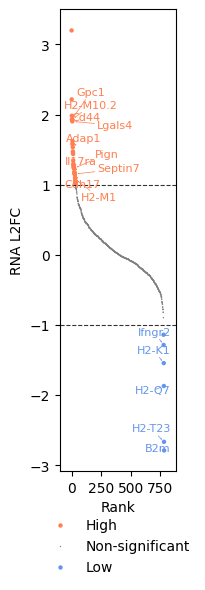

In [40]:
data = pd.read_csv('./5_mice_RNA.gene_summary.txt', header=0, sep='\t')
data['l2fc'] = data['pos|lfc']
data['sig'] = data['l2fc'].map(lambda x: 'High' if x > 1 else ('Low' if x < -1 else 'Non-significant'))
data.sort_values(by='l2fc', ascending=False, inplace=True)
data['rank'] = np.arange(len(data))

plt.figure(figsize=(1.5, 6))  # 创建新图形
# plt.gca().add_patch(plt.Rectangle((-0.6, -0.1), 1.2, 3, fill=False, edgecolor='black', linewidth=1))  # 添加外框
scatter = sns.scatterplot(x='rank', y='l2fc', data=data, hue='sig', palette=['coral', 'gray', 'cornflowerblue'], size='sig', sizes=[10, 1, 10], edgecolor='none', s=10)
# scatter = sns.scatterplot(x='l2fc', y='log10(p-value)', data=data, hue='sig', palette=['black', 'red'], edgecolor='none', s=10)
# plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8, alpha=0.8)  # 添加x=-0.5的线
plt.axhline(y=1, color='black', linestyle='--', linewidth=0.8, alpha=0.8)  # 添加y=1.5的线
plt.axhline(y=-1, color='black', linestyle='--', linewidth=0.8, alpha=0.8)  # 添加y=1.5的线
# plt.grid(True, alpha=0.3)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=1, frameon=False)
plt.xticks([0, 250, 500, 750])
plt.xlabel('Rank')
plt.ylabel('RNA L2FC')

# 添加标签
from adjustText import adjust_text

# texts = [plt.text(row['l2fc'], row['-log10(p-value)'], row['id'], fontsize=8, color='red')
        #  for _, row in data.iterrows() if (row['sig'] == 'Significant')]
texts = [plt.text(row['rank'], row['l2fc'], row['id'], fontsize=8, color='cornflowerblue') for _, row in data.iterrows() if (row['sig'] == 'Low') and \
         (row['id'] in ['B2m', 'H2-T23', 'H2-K1', 'H2-Q7', 'B4galt1', 'Arf6', 'Ifngr2', 'Cd47', 'Actn1'])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='cornflowerblue', lw=0.5))
texts = [plt.text(row['rank'], row['l2fc'], row['id'], fontsize=8, color='coral') for _, row in data.iterrows() if (row['sig'] == 'High') and \
         (row['id'] in ['H2-M10.2', 'Cdh17', 'Cd44', 'Adap1', 'Gpc1', 'Il17ra', 'H2-M1', 'Lgals4', 'Lyn', 'Septin7', 'H2-Q1', 'Pign'])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='coral', lw=0.5))
plt.title('')
sns.despine(left=False, bottom=False, right=False, top=False)
plt.xlim(-100, len(data) + 100)

# plt.rcParams['pdf.fonttype']=42
# plt.savefig("./plots/Neg-Invivo-Mageck.pdf", format="pdf", bbox_inches='tight')
plt.show()

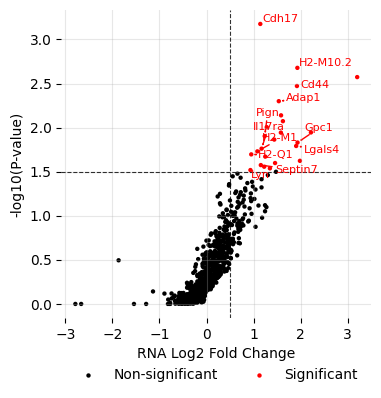

In [23]:
data = pd.read_csv('./5_mice_RNA.gene_summary.txt', header=0, sep='\t')
# data['-log10(p-value)'] = -np.log10([row['pos|p-value'] if row['pos|lfc'] > 0 else row['neg|p-value'] for _, row in data.iterrows()])
data['-log10(p-value)'] = -np.log10(data['pos|p-value'])
data['l2fc'] = data['pos|lfc']
data['sig'] = (data['-log10(p-value)'] > 1.5) & (data['l2fc'] > 0.5)
data['sig'] = data['sig'].map({True: 'Significant', False: 'Non-significant'})

plt.figure(figsize=(4, 4))  # 创建新图形
scatter = sns.scatterplot(x='l2fc', y='-log10(p-value)', data=data, hue='sig', palette=['black', 'red'], edgecolor='none', s=10)
# scatter = sns.scatterplot(x='l2fc', y='log10(p-value)', data=data, hue='sig', palette=['black', 'red'], edgecolor='none', s=10)
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=0.8, alpha=0.8)  # 添加x=-0.5的线
plt.axhline(y=1.5, color='black', linestyle='--', linewidth=0.8, alpha=0.8)  # 添加y=1.5的线
plt.grid(True, alpha=0.3)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2, frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xlabel('RNA Log2 Fold Change')
plt.ylabel('-log10(P-value)')

# 添加标签
from adjustText import adjust_text

# texts = [plt.text(row['l2fc'], row['-log10(p-value)'], row['id'], fontsize=8, color='red')
        #  for _, row in data.iterrows() if (row['sig'] == 'Significant')]
texts = [plt.text(row['l2fc'], row['-log10(p-value)'], row['id'], fontsize=8, color='red') for _, row in data.iterrows() if (row['sig'] == 'Significant') and \
         (row['id'] in ['H2-M10.2', 'Cdh17', 'Cd44', 'Adap1', 'Gpc1', 'Il17ra', 'H2-M1', 'Lgals4', 'Lyn', 'Septin7', 'H2-Q1', 'Pign'])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=1))
plt.title('')

plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/Pos-Invivo-Mageck.pdf", format="pdf", bbox_inches='tight')
plt.show()

In [24]:
gene_list = [
    'Zc3h12a',
    'Gata3',
    'Srgn',
    'Ddit3',
    'Piezo1',
    'L3mbtl3',
    'Nmb',
    'Mcoln1',
    'Tmem64',
    'Mark3',
    'Klrd1',
    'Glb1l2',
    'Flot1',
    'Adrb2',
    'Wipf1',
    'Pomt1',
    'Scamp4',
    'S100a11',
    'Kcna3',
    'Zscan12',
    'Zhx2',
    'Sorl1',
    'Cxcl16',
    'Fbxo7',
    'Cd44',
    'Ergic2',
    'Zfp987',
    'Cd52',
    'Ppia',
    'Aqp3',
    'Arntl',
    'Ikbip',
    'Slc39a8'
]

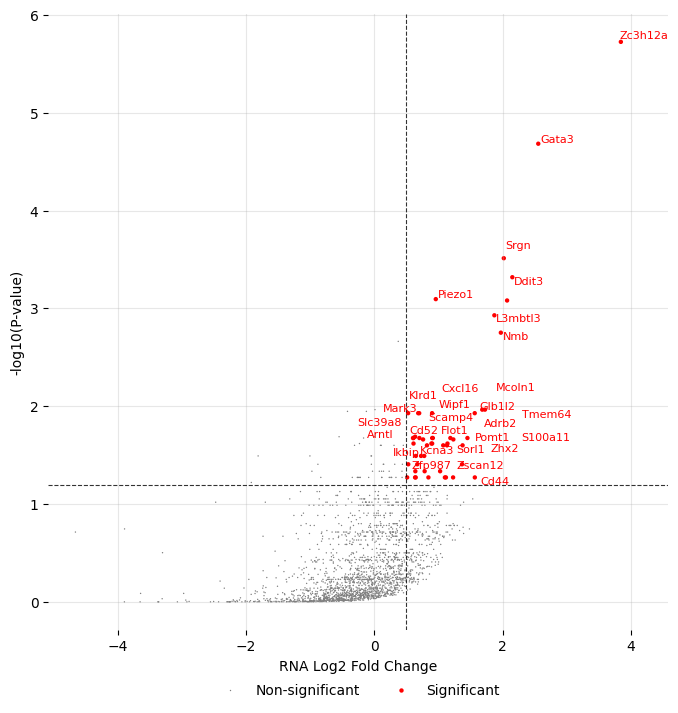

In [27]:
data = pd.read_csv('/home/zongxu/SpatialCRISPR/20231001BulkDNAScreen/05_draw/Tumor_T/MaGeCK_tumor.txt', header=0, sep='\t')
# data['-log10(p-value)'] = -np.log10([row['pos|p-value'] if row['pos|lfc'] > 0 else row['neg|p-value'] for _, row in data.iterrows()])
data['-log10(p-value)'] = -np.log10(data['pos|p-value'])
data['l2fc'] = data['pos|lfc']
data['sig'] = (data['-log10(p-value)'] > 1.2) & (data['l2fc'] > 0.5)
data['sig'] = data['sig'].map({True: 'Significant', False: 'Non-significant'})

plt.figure(figsize=(8, 8))  # 创建新图形
scatter = sns.scatterplot(x='l2fc', y='-log10(p-value)', data=data, hue='sig', palette=['gray', 'red'], edgecolor='none', size='sig', sizes=(10, 1))
# scatter = sns.scatterplot(x='l2fc', y='log10(p-value)', data=data, hue='sig', palette=['black', 'red'], edgecolor='none', s=10)
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=0.8, alpha=0.8)  # 添加x=-0.5的线
plt.axhline(y=1.2, color='black', linestyle='--', linewidth=0.8, alpha=0.8)  # 添加y=1.5的线
plt.grid(True, alpha=0.3)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.13), ncol=2, frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xlabel('RNA Log2 Fold Change')
plt.ylabel('-log10(P-value)')

# 添加标签
from adjustText import adjust_text

# texts = [plt.text(row['l2fc'], row['-log10(p-value)'], row['id'], fontsize=8, color='red')
        #  for _, row in data.iterrows() if (row['sig'] == 'Significant')]
texts = [plt.text(row['l2fc'], row['-log10(p-value)'], row['id'], fontsize=8, color='red') for _, row in data.iterrows() if (row['sig'] == 'Significant')
         and (row['id'] in gene_list)]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red', lw=0), expand_text=(1.5, 1.5), expand_points=(1.5, 1.5), expand_axes=True)
plt.title('')

plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/Pos-T-Mageck.pdf", format="pdf", bbox_inches='tight')
plt.show()

In [48]:
tumor_df

,id,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc
0,Zc3h12a,4,0.997780,0.996000,1.000000,2128,0,3.8383,2.040000e-08,0.000002,0.004950,1,3,3.8383
1,Gata3,4,1.000000,1.000000,1.000000,2135,0,2.5487,9.680000e-07,0.000021,0.027228,2,4,2.5487
2,Ddit3,4,0.802930,0.788310,1.000000,1788,1,2.1464,1.283300e-04,0.000483,0.318069,4,3,2.1464
3,Gm3604,4,0.474050,0.566550,1.000000,1326,1,2.0625,2.529700e-04,0.000836,0.367162,6,3,2.0625
4,Srgn,4,0.979890,0.964400,1.000000,2083,0,2.0129,7.560000e-05,0.000314,0.275578,3,3,2.0129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,Rps25,4,0.000002,0.000002,0.000825,2,4,-3.6493,1.000000e+00,1.000000,1.000000,2135,0,-3.6493
2131,Pabpc1,4,0.000077,0.000032,0.007013,12,3,-3.6520,7.415300e-01,0.816990,1.000000,1528,0,-3.6520
2132,H2-T23,4,0.000005,0.000002,0.000825,3,3,-3.8992,1.775400e-01,0.179570,1.000000,368,1,-3.8992
2133,Ppan,4,0.000019,0.000002,0.000825,6,4,-3.9045,9.999800e-01,1.000000,1.000000,2133,0,-3.9045


In [61]:
tumor_df['neg|lfc']

0       3.8383
1       2.5487
2       2.1464
3       2.0625
4       2.0129
         ...  
2130   -3.6493
2131   -3.6520
2132   -3.8992
2133   -3.9045
2134   -4.6689
Name: neg|lfc, Length: 2135, dtype: float64

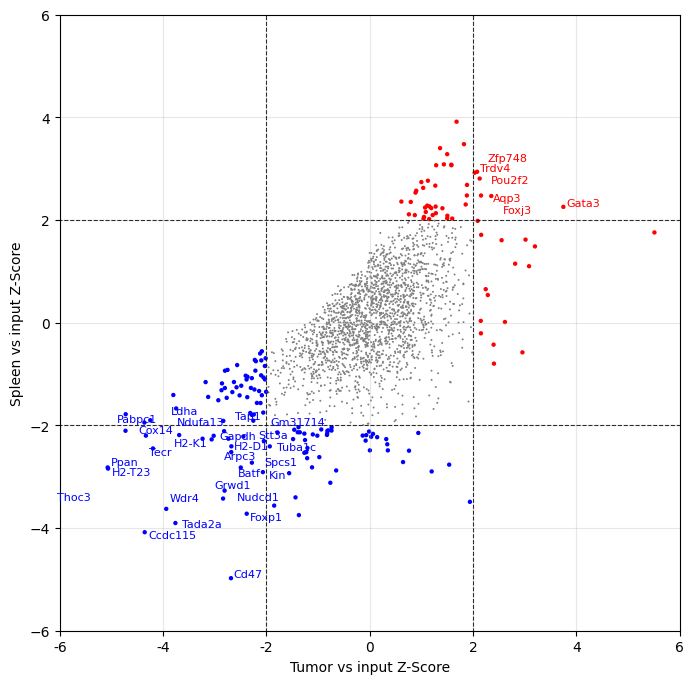

In [119]:
tumor_df = pd.read_csv('/home/wpy/stereoseq/20240502-SPACseq/bulkdata/tumor-remove-zero.gene_summary.txt', header=0, sep='\t')
spleen_df = pd.read_csv('/home/wpy/stereoseq/20240502-SPACseq/bulkdata/spleen.gene_summary.txt', header=0, sep='\t')
tumor_df= tumor_df.loc[spleen_df.index, :]

# 计算z_score
tumor_z = (tumor_df['neg|lfc'] - np.mean(tumor_df['neg|lfc'])) / np.std(tumor_df['neg|lfc'])
spleen_z = (spleen_df['neg|lfc'] - np.mean(spleen_df['neg|lfc'])) / np.std(spleen_df['neg|lfc'])

# 创建新的DataFrame以便绘图
z_score_df = pd.DataFrame({'Tumor Z-Score': tumor_z, 'Spleen Z-Score': spleen_z})

# 绘制scatterplot
plt.figure(figsize=(8, 8))

# 根据区域设置颜色
conditions = [
    (z_score_df['Tumor Z-Score'] < -2) & (z_score_df['Spleen Z-Score'] < -2),
    (z_score_df['Tumor Z-Score'] < -2) & (z_score_df['Spleen Z-Score'] >= -2) & (z_score_df['Spleen Z-Score'] <= 2),
    (z_score_df['Tumor Z-Score'] < -2) & (z_score_df['Spleen Z-Score'] > 2),
    (z_score_df['Tumor Z-Score'] >= -2) & (z_score_df['Tumor Z-Score'] <= 2) & (z_score_df['Spleen Z-Score'] < -2),
    (z_score_df['Tumor Z-Score'] >= -2) & (z_score_df['Tumor Z-Score'] <= 2) & (z_score_df['Spleen Z-Score'] > 2),
    (z_score_df['Tumor Z-Score'] > 2) & (z_score_df['Spleen Z-Score'] < -2),
    (z_score_df['Tumor Z-Score'] > 2) & (z_score_df['Spleen Z-Score'] >= -2) & (z_score_df['Spleen Z-Score'] <= 2),
    (z_score_df['Tumor Z-Score'] > 2) & (z_score_df['Spleen Z-Score'] > 2)
]

colors = ['blue', 'blue', 'gray', 'blue', 'red', 'red', 'red', 'red']
z_score_df['color'] = np.select(conditions, colors, default='gray')

# 绘制散点图
sns.scatterplot(x='Tumor Z-Score', y='Spleen Z-Score', data=z_score_df, hue='color', palette=['red', 'gray', 'blue'], edgecolor='none', legend=False, size='color', sizes=[10, 2, 10])

# 添加注释
from adjustText import adjust_text

texts = [plt.text(row['Tumor Z-Score'], row['Spleen Z-Score'], tumor_df['id'][i], fontsize=8, color='blue') 
         for i, row in z_score_df.iterrows() if (row['Tumor Z-Score'] < -2 and row['Spleen Z-Score'] < -2)]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red', lw=0), expand_text=(1.5, 1.5), expand_points=(1.5, 1.5), expand_axes=True)
texts = [plt.text(row['Tumor Z-Score'], row['Spleen Z-Score'], tumor_df['id'][i], fontsize=8, color='red') 
         for i, row in z_score_df.iterrows() if (row['Tumor Z-Score'] > 2 and row['Spleen Z-Score'] > 2)]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red', lw=0), expand_text=(1.5, 1.5), expand_points=(1.5, 1.5), expand_axes=True)

plt.xlabel('Tumor vs input Z-Score')
plt.ylabel('Spleen vs input Z-Score')
plt.grid(True, alpha=0.3)

plt.hlines(y=2, xmin=-8, xmax=8, color='black', linestyle='--', linewidth=0.8, alpha=0.8)
plt.vlines(x=2, ymin=-8, ymax=8, color='black', linestyle='--', linewidth=0.8, alpha=0.8)
plt.hlines(y=-2, xmin=-8, xmax=8, color='black', linestyle='--', linewidth=0.8, alpha=0.8)
plt.vlines(x=-2, ymin=-8, ymax=8, color='black', linestyle='--', linewidth=0.8, alpha=0.8)

plt.ylim(-6, 6)
plt.xlim(-6, 6)
plt.xticks(ticks=[-6, -4, -2, 0, 2, 4, 6], labels=['-6', '-4', '-2', '0', '2', '4', '6'])

plt.show()

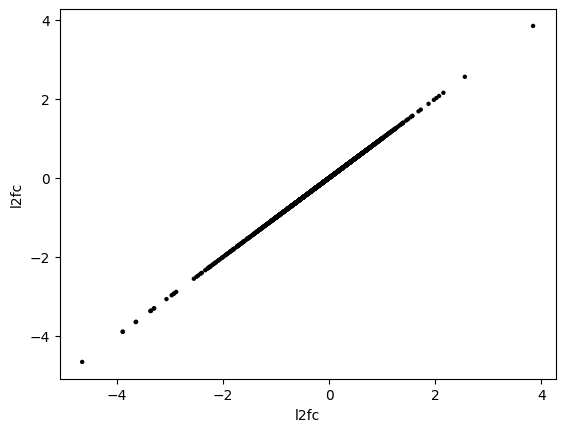

In [34]:
tumor_data = pd.read_csv('/home/zongxu/SpatialCRISPR/20231001BulkDNAScreen/05_draw/Tumor_T/MaGeCK_tumor.txt', header=0, sep='\t')
# data['-log10(p-value)'] = -np.log10([row['pos|p-value'] if row['pos|lfc'] > 0 else row['neg|p-value'] for _, row in data.iterrows()])
tumor_data['-log10(p-value)'] = -np.log10(tumor_data['neg|p-value'])
tumor_data['l2fc'] = tumor_data['neg|lfc']

spleen_data = pd.read_csv('/home/zongxu/SpatialCRISPR/20231001BulkDNAScreen/05_draw/Enrichment/TumorVST/MaGeCK_tumor.txt', header=0, sep='\t')
# data['-log10(p-value)'] = -np.log10([row['pos|p-value'] if row['pos|lfc'] > 0 else row['neg|p-value'] for _, row in data.iterrows()])
spleen_data['-log10(p-value)'] = -np.log10(spleen_data['neg|p-value'])
spleen_data['l2fc'] = spleen_data['neg|lfc']

sns.scatterplot(x=tumor_data.l2fc, y=spleen_data.l2fc, data=tumor_data, color='black', edgecolor='none', s=10)
plt.show()

In [20]:
dna = pd.read_csv('./bulkdata/DNA_B304.sgrna_summary.txt', index_col=0, sep='\t')
rna = pd.read_csv('./bulkdata/RNA-B304.sgrna_summary.txt', index_col=0, sep='\t')

draw_df = pd.concat([dna['LFC'], rna['LFC']], axis=1)
draw_df.columns = ['DNA', 'RNA']
draw_df

,DNA,RNA
sgrna,,
s_10866,4.836800,-2.64120
s_10830,4.515900,4.40820
s_10076,2.878500,1.63070
s_11261,3.260500,3.72720
s_10332,3.060600,4.31680
...,...,...
s_10083,0.004033,0.20754
s_10835,0.003477,-0.43414
s_10526,0.003466,-0.49402


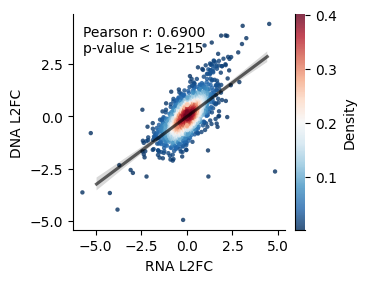

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.ticker import MaxNLocator
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 读取数据
dna = pd.read_csv('./bulkdata/DNA_B304.sgrna_summary.txt', index_col=0, sep='\t')
rna = pd.read_csv('./bulkdata/RNA-B304.sgrna_summary.txt', index_col=0, sep='\t')

draw_df = pd.concat([dna['LFC'], rna['LFC']], axis=1)
draw_df.columns = ['DNA', 'RNA']
draw_df

fig, ax = plt.subplots(figsize=(3, 2.8))

# 绘制Pearson相关系数
r = pearsonr(draw_df['DNA'], draw_df['RNA'])

# 计算点的密度
x = draw_df['DNA'].values
y = draw_df['RNA'].values
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# 创建散点图，点的颜色表示密度
scatter = ax.scatter(x, y, c=z, s=10, edgecolor='none', alpha=0.8, cmap='RdBu_r')
# 创建垂直colorbar并设置位置到右侧中部
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 控制colorbar位置（右侧）
cbar = fig.colorbar(scatter, cax=cax, orientation='vertical')  # 设置为垂直colorbar
cbar.set_label('Density')  # 添加Density标签

# 去除colorbar的外边框
cbar.outline.set_visible(False)

# 添加拟合曲线
sns.regplot(x='RNA', y='DNA', data=draw_df, scatter=False, ax=ax, color='black', line_kws={"alpha": 0.6})

# 设置坐标轴范围（根据需要可以设置）
# ax.set_ylim([2, 18])
# ax.set_xlim([2, 18])

# 在图1上标注 Pearson 相关系数和显著性
ax.text(0.05, 0.95, f'Pearson r: {r[0]:.4f}\np-value < 1e{(np.log10(r[1]) if r[1] > 0 else -32):.0f}', 
           transform=ax.transAxes, ha='left', va='top', fontsize=10)

# 设置坐标轴标签
ax.set_ylabel('DNA L2FC')
ax.set_xlabel('RNA L2FC')

# 设置科学计数法显示
ax.ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))

# 设置坐标轴的刻度间距
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # X轴最多显示5个刻度
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Y轴最多显示5个刻度

# 美化图形，移除坐标轴边缘线
sns.despine()

# 显示图形
plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/DNA_RNA_guide-l2fc.pdf", format="pdf", bbox_inches='tight')
plt.show()

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.ticker import MaxNLocator
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 读取数据
dna = pd.read_csv('./bulkdata/DNA_B304.gene_summary.txt', index_col=0, sep='\t')
rna = pd.read_csv('./bulkdata/RNA-B304.gene_summary.txt', index_col=0, sep='\t')

draw_df = pd.concat([dna['LFC'], rna['LFC']], axis=1)
draw_df.columns = ['DNA', 'RNA']
draw_df

fig, ax = plt.subplots(figsize=(3, 2.8))

# 绘制Pearson相关系数
r = pearsonr(draw_df['DNA'], draw_df['RNA'])

# 计算点的密度
x = draw_df['DNA'].values
y = draw_df['RNA'].values
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# 创建散点图，点的颜色表示密度
scatter = ax.scatter(x, y, c=z, s=10, edgecolor='none', alpha=0.8, cmap='RdBu_r')
# 创建垂直colorbar并设置位置到右侧中部
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 控制colorbar位置（右侧）
cbar = fig.colorbar(scatter, cax=cax, orientation='vertical')  # 设置为垂直colorbar
cbar.set_label('Density')  # 添加Density标签

# 去除colorbar的外边框
cbar.outline.set_visible(False)

# 添加拟合曲线
sns.regplot(x='RNA', y='DNA', data=draw_df, scatter=False, ax=ax, color='black', line_kws={"alpha": 0.6})

# 设置坐标轴范围（根据需要可以设置）
# ax.set_ylim([2, 18])
# ax.set_xlim([2, 18])

# 在图1上标注 Pearson 相关系数和显著性
ax.text(0.05, 0.95, f'Pearson r: {r[0]:.4f}\np-value < 1e{(np.log10(r[1]) if r[1] > 0 else -32):.0f}', 
           transform=ax.transAxes, ha='left', va='top', fontsize=10)

# 设置坐标轴标签
ax.set_ylabel('DNA L2FC')
ax.set_xlabel('RNA L2FC')

# 设置科学计数法显示
ax.ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))

# 设置坐标轴的刻度间距
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # X轴最多显示5个刻度
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Y轴最多显示5个刻度

# 美化图形，移除坐标轴边缘线
sns.despine()

# 显示图形
plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/DNA_RNA_gene-l2fc.pdf", format="pdf", bbox_inches='tight')
plt.show()

KeyError: 'LFC'

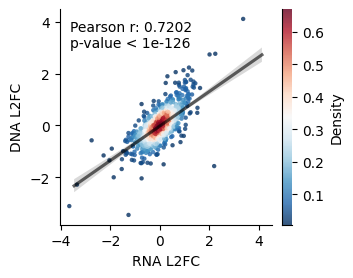

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.ticker import MaxNLocator
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 读取数据
dna = pd.read_csv('./bulkdata/DNA_B304.gene_summary.txt', index_col=0, sep='\t')
rna = pd.read_csv('./bulkdata/RNA-B304.gene_summary.txt', index_col=0, sep='\t')

draw_df = pd.concat([dna['pos|lfc'], rna['pos|lfc']], axis=1)
draw_df.columns = ['DNA', 'RNA']
draw_df

fig, ax = plt.subplots(figsize=(3, 2.8))

# 绘制Pearson相关系数
r = pearsonr(draw_df['DNA'], draw_df['RNA'])

# 计算点的密度
x = draw_df['DNA'].values
y = draw_df['RNA'].values
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# 创建散点图，点的颜色表示密度
scatter = ax.scatter(x, y, c=z, s=10, edgecolor='none', alpha=0.8, cmap='RdBu_r')
# 创建垂直colorbar并设置位置到右侧中部
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 控制colorbar位置（右侧）
cbar = fig.colorbar(scatter, cax=cax, orientation='vertical')  # 设置为垂直colorbar
cbar.set_label('Density')  # 添加Density标签

# 去除colorbar的外边框
cbar.outline.set_visible(False)

# 添加拟合曲线
sns.regplot(x='RNA', y='DNA', data=draw_df, scatter=False, ax=ax, color='black', line_kws={"alpha": 0.6})

# 设置坐标轴范围（根据需要可以设置）
# ax.set_ylim([2, 18])
# ax.set_xlim([2, 18])

# 在图1上标注 Pearson 相关系数和显著性
ax.text(0.05, 0.95, f'Pearson r: {r[0]:.4f}\np-value < 1e{(np.log10(r[1]) if r[1] > 0 else -32):.0f}', 
           transform=ax.transAxes, ha='left', va='top', fontsize=10)

# 设置坐标轴标签
ax.set_ylabel('DNA L2FC')
ax.set_xlabel('RNA L2FC')

# 设置科学计数法显示
ax.ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))

# 设置坐标轴的刻度间距
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # X轴最多显示5个刻度
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Y轴最多显示5个刻度

# 美化图形，移除坐标轴边缘线
sns.despine()

# 显示图形
plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/DNA_RNA_gene-l2fc.pdf", format="pdf", bbox_inches='tight')
plt.show()

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.neighbors import KernelDensity
from mpl_toolkits.axes_grid1 import make_axes_locatable


# 假设 draw_df 已经创建并处理
draw_df.columns = ['DNA', 'RNA']

# 创建子图
fig, ax = plt.subplots(1, 1, figsize=(5, 4.6))

# 图1：绘制 RNA-B304 vs MIDCount 的散点图，并拟合线性曲线
sns.regplot(data=draw_df, x='RNA', y='DNA', scatter_kws={'color': 'black', 's': 10}, line_kws={'color': 'black'}, ax=ax)
sns.despine(ax=ax)
# ax.set_yscale('log')
# ax.set_xscale('log')

# 计算 Pearson 相关系数及其显著性 p 值
r_value1, p_value1 = pearsonr(draw_df['RNA'], draw_df['DNA'])

# 在图1上标注 Pearson 相关系数和显著性
ax.text(0.05, 0.95, f'Pearson r: {r_value1:.4f}\np-value: {p_value1:.4f}', 
           transform=ax.transAxes, ha='left', va='top', fontsize=10)

# 美化图形，移除坐标轴边缘线
sns.despine()

# # 创建横向colorbar并设置位置到右下角
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("bottom", size=0.1, pad=0.5)  # 控制colorbar位置（底部）
# cbar = fig.colorbar(sc, cax=cax, orientation='horizontal')  # 设置为横向colorbar
# cbar.set_label('Density')  # 添加Density标签

# # 去除colorbar的外边框（如果没有ax.get_frame，直接忽略）
# cbar.outline.set_visible(False)

ax.set_ylabel('DNA L2FC')
ax.set_xlabel('RNA L2FC')

# 显示图形
plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/DNA_RNA_guide-l2fc.pdf", format="pdf", bbox_inches='tight')
plt.show()

NameError: name 'draw_df' is not defined

In [2]:
bulk_df = pd.read_csv('../in_vivo_tumor/c169743b-102a-42fe-9590-bc5d01789441tumor.count.txt', sep='\t', index_col=0)
bulk_df['geneID'] = ['sg' + gene + '_gene' if gene.startswith('Non') else 'sg' + gene + '_' + str(2 - int(idx[-1]) % 2) + '_gene' for gene, idx in zip(bulk_df.Gene, bulk_df.index)]
order_bulk = bulk_df[['RNA-B304', 'geneID']].set_index('geneID', drop=True).sort_values(by='RNA-B304', ascending=False)

In [3]:
file_path = '/home/wpy/stereoseq/20240802-Tumor/RNA/B03502E5.gem'
df = pd.read_csv(file_path, header=0, index_col=0, sep='\t', comment='#')

In [4]:
bulk_df

,Gene,DNA-B301,DNA-B302,DNA-B303,DNA-B304,DNA-B305,DNA-B306,DNA-B307,DNA-B308,DNA-B309,...,RNA-B305,RNA-B306,RNA-B307,RNA-B308,RNA-B309,RNA-B310,RNA-Inp,RNA-mc38,RNA-tumor,geneID
sgRNA,,,,,,,,,,,,,,,,,,,,,
s_11226,Furin,4006,6661,6129,5448,4354,10318,4785,8180,10265,...,14131,14480,10550,20924,13478,15954,20877,12773,139730,sgFurin_2_gene
s_10194,Gpr35,2330,6746,7364,7752,5070,10392,13398,4366,11283,...,11466,7448,23349,5622,20570,8137,14526,10994,112200,sgGpr35_2_gene
s_10465,H2-DMb1,4362,6089,12616,11220,10918,17589,12656,16609,8091,...,15436,10816,7832,39269,18692,9862,19828,14082,176569,sgH2-DMb1_1_gene
s_11196,Slc40a1,9403,5388,7672,18403,2902,1395,5014,10044,9032,...,20539,7667,8395,15062,19362,13847,13012,8407,145791,sgSlc40a1_2_gene
s_10991,Arl4a,2221,3515,4921,5698,5519,4348,2265,2718,6241,...,14789,9116,5673,4710,14012,6679,10980,7534,86046,sgArl4a_1_gene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_10222,Anxa2,2,541,99,7,3,4,11,2875,16,...,134,18,236,1773,156,114,344,193,2904,sgAnxa2_2_gene
s_11274,Pip5k1a,1,379,184,10,9,3,1,1,1,...,144,6,3,485,564,83,231,175,1894,sgPip5k1a_2_gene
s_10630,Cdh17,0,1,0,0,1,1,0,3,0,...,8,1,5,1,172,675,86,29,885,sgCdh17_2_gene


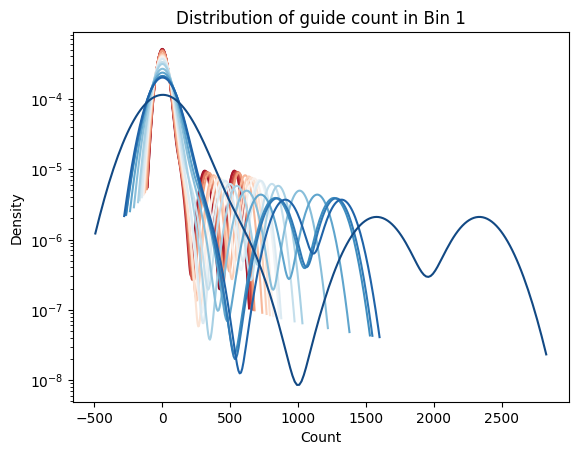

In [8]:
import seaborn as sns
pdf = df.groupby('geneID')['MIDCount'].value_counts().unstack().fillna(0)
pdf['sum'] = pdf.sum(axis=1)
pdf.sort_values(by='sum', inplace=True, ascending=False)
pdf = pdf.iloc[:20]
sns.kdeplot(pdf.T, fill=False, palette='RdBu_r', legend=False)
# plt.text(2500, 3e-6, 'Ybx1_1')
plt.xlabel('Count')
plt.title('Distribution of guide count in Bin 1')
plt.gca().set_yscale('log')

Text(0.5, 1.0, 'Count Distribution of bin 1 across sample')

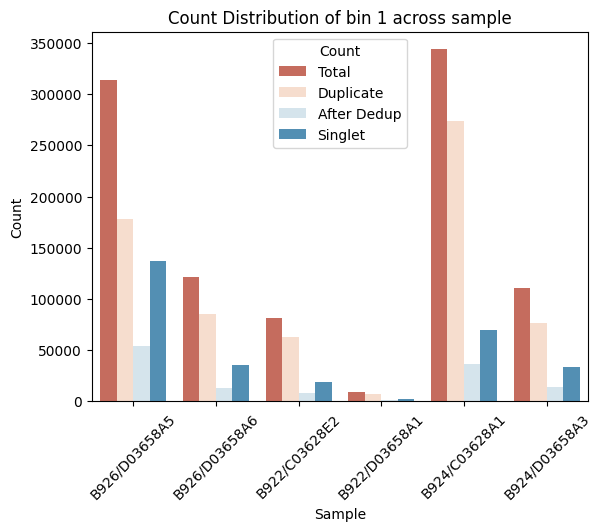

In [7]:
pdf = pd.DataFrame(columns=['Total', 'Duplicate', 'After Dedup', 'Singlet'])
for sample in ['B926/D03658A5', 'B926/D03658A6', 'B922/C03628E2', 'B922/D03658A1', 'B924/C03628A1', 'B924/D03658A3']:
    file_path = "~/stereoseq/20240502-SPACseq/gRNA/" + sample
    guide_df = pd.read_csv(file_path + '.guide.gem', header=0, index_col=0, sep='\t', comment='#')
    cdf = pd.DataFrame({
        'Total': guide_df.shape[0],
        'After Dedup': guide_df[guide_df.duplicated(subset=['x', 'y'], keep=False)].drop_duplicates(subset=['x', 'y']).shape[0],
        'Singlet': guide_df.drop_duplicates(subset=['x', 'y']).shape[0],
    }, index=[sample])
    cdf['Duplicate'] = cdf['Total'] - cdf['Singlet']
    pdf = pd.concat([pdf, cdf])
pdf = pdf.T.melt()
pdf['Count'] = ['Total', 'Duplicate', 'After Dedup', 'Singlet'] * 6
sns.barplot(pdf, x='variable', y='value', hue='Count', palette='RdBu')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Sample')
plt.title('Count Distribution of bin 1 across sample')

In [8]:
pear = {}

In [9]:
# nothing to do
order_cnt = df.reset_index().groupby(by='geneID')[['MIDCount']].sum().sort_values(by='MIDCount', ascending=False)

order_bulk['rank'] = list(range(1, len(order_bulk.index) + 1))
order_cnt['rank'] = list(range(1, len(order_cnt.index) + 1))

t_df = pd.concat([order_bulk, order_cnt], axis=1).fillna(0).sort_values('MIDCount', ascending=False).head(50)
pear['Raw data'] = pearsonr(t_df['RNA-B304'], t_df['MIDCount'])

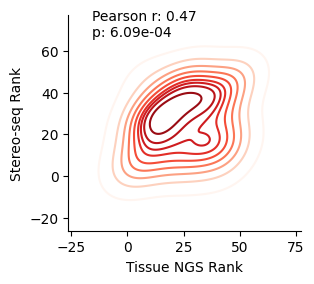

In [10]:
cdf = pd.concat([order_bulk, order_cnt], axis=1).fillna(0).sort_values('MIDCount', ascending=False).head(50)
cdf.columns = ['RNA-B304', 'Bulk rank', 'MIDCount', 'Spatial rank']

plt.figure(figsize=(3, 2.8))
p = pearsonr(np.log10(cdf['RNA-B304'] + 1), np.log10(cdf['MIDCount'] + 1))
cdf['RNA-B304'] = cdf['RNA-B304'].rank(ascending=False)
cdf['MIDCount'] = cdf['MIDCount'].rank(ascending=False)
# sns.regplot(cdf, x='RNA-B304', y='MIDCount', scatter=False, line_kws={'color': 'black'})
sns.kdeplot(cdf, x='RNA-B304', y='MIDCount', cmap='Reds', fill=False, alpha=1, bw_adjust=1.2)
# p = spearmanr(cdf['HD-subQ1-output-RNA'], cdf['HD'])
plt.text(0.1, 0.9, f'Pearson r: {p[0]:.2f}\np: {p[1]:.2e}', transform=plt.gca().transAxes)
# plt.gca().set_yscale('log')
# plt.gca().set_xscale('log')
plt.xlabel('Tissue NGS Rank')
plt.ylabel('Stereo-seq Rank')
sns.despine()

plt.savefig('./plots/Tissue_NGS_vs_Stereo-seq.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [11]:
order_bulk

,RNA-B304,rank
geneID,,
sgCant1_2_gene,271683,1
sgCdc42se1_2_gene,249861,2
sgTspan13_2_gene,213049,3
sgEmp2_1_gene,210381,4
sgAbca2_1_gene,169323,5
...,...,...
sgRnf149_2_gene,41,1516
sgAnxa2_2_gene,31,1517
sgEhd1_2_gene,22,1518


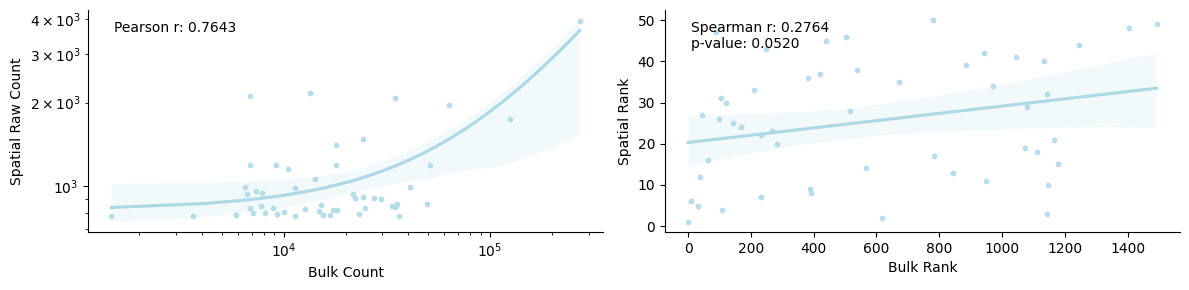

In [12]:
# 假设 draw_df 已经创建并处理
draw_df = pd.concat([order_bulk, order_cnt], axis=1).fillna(0).sort_values('MIDCount', ascending=False).head(50)
draw_df.columns = ['RNA-B304', 'Bulk rank', 'MIDCount', 'Spatial rank']

# 创建子图
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

# 图1：绘制 RNA-B304 vs MIDCount 的散点图，并拟合线性曲线
sns.regplot(data=draw_df, x='RNA-B304', y='MIDCount', scatter_kws={'color': 'lightblue', 's': 10}, line_kws={'color': 'lightblue'}, ax=ax[0])
sns.despine(ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_xscale('log')

# 计算 Pearson 相关系数及其显著性 p 值
r_value1 = pearsonr(draw_df['RNA-B304'], draw_df['MIDCount'])[0]

# 在图1上标注 Pearson 相关系数和显著性
ax[0].text(0.05, 0.95, f'Pearson r: {r_value1:.4f}',
           transform=ax[0].transAxes, ha='left', va='top', fontsize=10)

# 设置坐标轴标签
ax[0].set_xlabel('Bulk Count')
ax[0].set_ylabel('Spatial Raw Count')

# 图2：绘制 Bulk rank vs Spatial rank 的散点图，并拟合线性曲线
sns.regplot(data=draw_df, x='Bulk rank', y='Spatial rank', scatter_kws={'color': 'lightblue', 's': 10}, line_kws={'color': 'lightblue'}, ax=ax[1])
sns.despine(ax=ax[1])

# 计算第二个图的 Pearson 相关系数及其显著性 p 值
r_value2, p_value2 = spearmanr(draw_df['Bulk rank'], draw_df['Spatial rank'])

# 在图2上标注 Pearson 相关系数和显著性
ax[1].text(0.05, 0.95, f'Spearman r: {r_value2:.4f}\np-value: {p_value2:.4f}', 
           transform=ax[1].transAxes, ha='left', va='top', fontsize=10)

# 设置坐标轴标签
ax[1].set_xlabel('Bulk Rank')
ax[1].set_ylabel('Spatial Rank')

# 显示图形
plt.tight_layout()
plt.show()


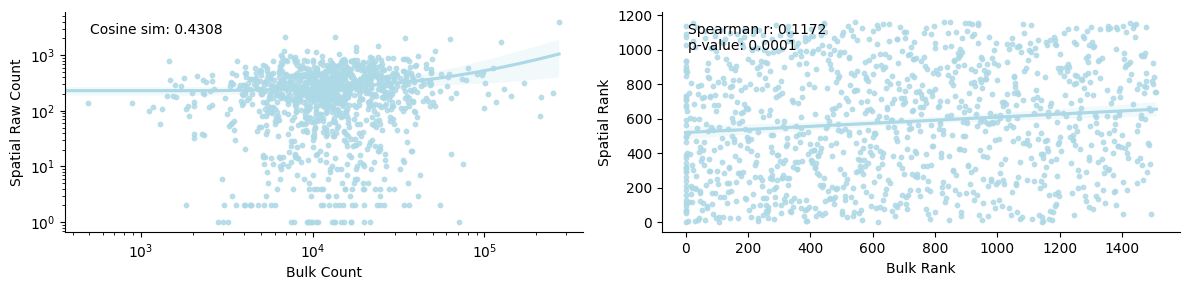

In [26]:
draw_df = pd.concat([order_bulk, order_cnt], axis=1).fillna(0).sort_values('MIDCount', ascending=False).head(5000)
# 假设 draw_df 已经创建并处理
draw_df.columns = ['RNA-B304', 'Bulk rank', 'MIDCount', 'Spatial rank']
draw_df = draw_df[draw_df.MIDCount > 0]

# 创建子图
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

# 图1：绘制 RNA-B304 vs MIDCount 的散点图，并拟合线性曲线
sns.regplot(data=draw_df, x='RNA-B304', y='MIDCount', scatter_kws={'color': 'lightblue', 's': 10}, line_kws={'color': 'lightblue'}, ax=ax[0])
sns.despine(ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_xscale('log')

# 计算 Pearson 相关系数及其显著性 p 值
r_value1 = cosine(draw_df['RNA-B304'], draw_df['MIDCount'])

# 在图1上标注 Pearson 相关系数和显著性
ax[0].text(0.05, 0.95, f'Cosine sim: {r_value1:.4f}', 
           transform=ax[0].transAxes, ha='left', va='top', fontsize=10)

# 设置坐标轴标签
ax[0].set_xlabel('Bulk Count')
ax[0].set_ylabel('Spatial Raw Count')

# 图2：绘制 Bulk rank vs Spatial rank 的散点图，并拟合线性曲线
sns.regplot(data=draw_df, x='Bulk rank', y='Spatial rank', scatter_kws={'color': 'lightblue', 's': 10}, line_kws={'color': 'lightblue'}, ax=ax[1])
sns.despine(ax=ax[1])

# 计算第二个图的 Pearson 相关系数及其显著性 p 值
r_value2, p_value2 = spearmanr(draw_df['Bulk rank'], draw_df['Spatial rank'])

# 在图2上标注 Pearson 相关系数和显著性
ax[1].text(0.05, 0.95, f'Spearman r: {r_value2:.4f}\np-value: {p_value2:.4f}', 
           transform=ax[1].transAxes, ha='left', va='top', fontsize=10)

# 设置坐标轴标签
ax[1].set_xlabel('Bulk Rank')
ax[1].set_ylabel('Spatial Rank')

# 显示图形
plt.tight_layout()
plt.show()

In [10]:
# assign without filter
order_cnt = df.reset_index().groupby(by='geneID')[['MIDCount']].count().sort_values(by='MIDCount', ascending=False)

order_bulk['rank'] = list(range(1, len(order_bulk.index) + 1))
order_cnt['rank'] = list(range(1, len(order_cnt.index) + 1))

t_df = pd.concat([order_bulk, order_cnt], axis=1).fillna(0).sort_values('MIDCount', ascending=False).head(50)
pear['Binary'] = pearsonr(t_df['RNA-B304'], t_df['MIDCount'])

In [14]:
dup

,geneID,x,y,MIDCount,ExonCount
0,sgNon-targeting_42_gene,4696,13904,1,1
1,sgNon-targeting_42_gene,7769,13324,1,1
2,sgNon-targeting_42_gene,6907,16342,1,1
3,sgNon-targeting_42_gene,6237,17557,1,1
4,sgNon-targeting_42_gene,6639,16765,1,1
...,...,...,...,...,...
166568,sgPdzk1ip1_1_gene,6179,17724,2,2
166569,sgPdzk1ip1_1_gene,19201,7061,1,1
166570,sgPdzk1ip1_1_gene,12968,13654,1,1
166571,sgPdzk1ip1_1_gene,5319,17135,3,3


In [13]:
# filter without assign
dup = df[df.duplicated(subset=['x', 'y'], keep=False)].reset_index()
dup.groupby(['x', 'y'])[['geneID', 'MIDCount']].max().reset_index()
dup['ExonCount'] = dup['MIDCount']
single = df.drop_duplicates(subset=['x', 'y']).reset_index()
order_cnt = pd.concat([dup, single]).reset_index(drop=True).groupby('geneID')[['MIDCount']].sum().sort_values(by='MIDCount', ascending=False)

order_bulk['rank'] = list(range(1, len(order_bulk.index) + 1))
order_cnt['rank'] = list(range(1, len(order_cnt.index) + 1))

t_df = pd.concat([order_bulk, order_cnt], axis=1).fillna(0).sort_values('MIDCount', ascending=False).head(50)
pear['Assign max'] = pearsonr(t_df['RNA-B304'], t_df['MIDCount'])

In [17]:
# filter with assign
import preprocessing
reported_df = preprocessing.filter_guide_reads(
    gem_path='/home/wpy/stereoseq/20240802-Tumor/RNA/B03502E5.cut.combined.offset.guide.gem',
    guide_prefix='sg',
    filter_threshold=1,
    assign_pattern='max',
    binarilize=False
)
order_cnt = reported_df.groupby('geneID')[['MIDCount']].count().sort_values(by='MIDCount', ascending=False)

order_bulk['rank'] = list(range(1, len(order_bulk.index) + 1))
order_cnt['rank'] = list(range(1, len(order_cnt.index) + 1))

t_df = pd.concat([order_bulk, order_cnt], axis=1).fillna(0).sort_values('MIDCount', ascending=False).head(50)
pear['Assign max and binary'] = pearsonr(t_df['RNA-B304'], t_df['MIDCount'])

In [16]:
# dropout without assign
single = df.drop_duplicates(subset=['x', 'y']).reset_index()
order_cnt = single.reset_index(drop=True).groupby('geneID')[['MIDCount']].sum().sort_values(by='MIDCount', ascending=False)

order_bulk['rank'] = list(range(1, len(order_bulk.index) + 1))
order_cnt['rank'] = list(range(1, len(order_cnt.index) + 1))

t_df = pd.concat([order_bulk, order_cnt], axis=1).fillna(0).sort_values('MIDCount', ascending=False).head(50)
pear['Drop duplicates'] = pearsonr(t_df['RNA-B304'], t_df['MIDCount'])

In [21]:
# filter with assign
import preprocessing
reported_df = preprocessing.filter_guide_reads(
    gem_path='/home/wpy/stereoseq/20240802-Tumor/RNA/B03502E5.cut.combined.offset.guide.gem',
    guide_prefix='sg',
    filter_threshold=1,
    assign_pattern='all',
    binarilize=True
)
order_cnt = reported_df.groupby('geneID')[['MIDCount']].count().sort_values(by='MIDCount', ascending=False)

order_bulk['rank'] = list(range(1, len(order_bulk.index) + 1))
order_cnt['rank'] = list(range(1, len(order_cnt.index) + 1))

t_df = pd.concat([order_bulk, order_cnt], axis=1).fillna(0).sort_values('MIDCount', ascending=False).head(50)
pear['Drop low and binary'] = pearsonr(t_df['RNA-B304'], t_df['MIDCount']) 

In [9]:
pd.concat([order_bulk, order_cnt], axis=1).fillna(0).sort_values('MIDCount', ascending=False).to_csv('./B304_bulkRNA_umi_rank.csv')

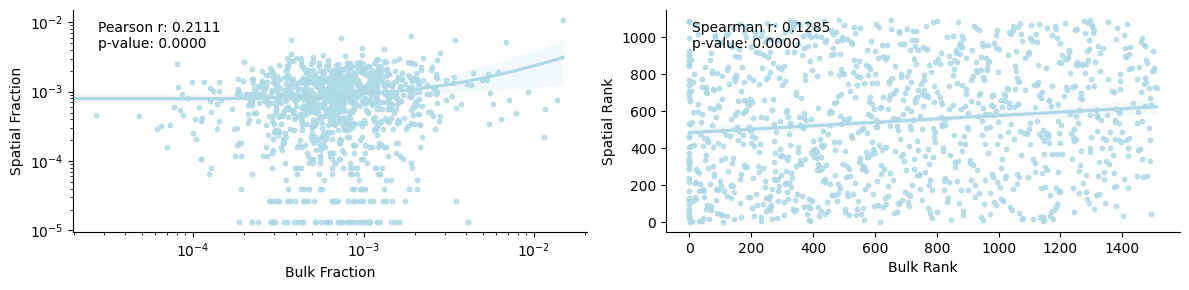

In [32]:
draw_df = pd.concat([order_bulk, order_cnt], axis=1).fillna(0).sort_values('MIDCount', ascending=False).head(5000)
# 假设 draw_df 已经创建并处理
draw_df.columns = ['RNA-B304', 'Bulk rank', 'MIDCount', 'Spatial rank']

draw_df = draw_df[draw_df.MIDCount > 0]
draw_df.MIDCount = draw_df.MIDCount / draw_df.MIDCount.sum()
draw_df['RNA-B304'] = draw_df['RNA-B304'] / draw_df['RNA-B304'].sum()

# 创建子图
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

# 图1：绘制 RNA-B304 vs MIDCount 的散点图，并拟合线性曲线
sns.regplot(data=draw_df, x='RNA-B304', y='MIDCount', scatter_kws={'color': 'lightblue', 's': 10}, line_kws={'color': 'lightblue'}, ax=ax[0])
sns.despine(ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_xscale('log')

# 计算 Pearson 相关系数及其显著性 p 值
r_value1, p_value1 = pearsonr(draw_df['RNA-B304'], draw_df['MIDCount'])

# 在图1上标注 Pearson 相关系数和显著性
ax[0].text(0.05, 0.95, f'Pearson r: {r_value1:.4f}\np-value: {p_value1:.4f}', 
           transform=ax[0].transAxes, ha='left', va='top', fontsize=10)

# 设置坐标轴标签
ax[0].set_xlabel('Bulk Fraction')
ax[0].set_ylabel('Spatial Fraction')

# 图2：绘制 Bulk rank vs Spatial rank 的散点图，并拟合线性曲线
sns.regplot(data=draw_df, x='Bulk rank', y='Spatial rank', scatter_kws={'color': 'lightblue', 's': 10}, line_kws={'color': 'lightblue'}, ax=ax[1])
sns.despine(ax=ax[1])

# 计算第二个图的 Pearson 相关系数及其显著性 p 值
r_value2, p_value2 = spearmanr(draw_df['Bulk rank'], draw_df['Spatial rank'])

# 在图2上标注 Pearson 相关系数和显著性
ax[1].text(0.05, 0.95, f'Spearman r: {r_value2:.4f}\np-value: {p_value2:.4f}', 
           transform=ax[1].transAxes, ha='left', va='top', fontsize=10)

# 设置坐标轴标签
ax[1].set_xlabel('Bulk Rank')
ax[1].set_ylabel('Spatial Rank')

# 显示图形
plt.tight_layout()
plt.show()

In [36]:
draw_df

,RNA-B304,Bulk rank,MIDCount,Spatial rank
geneID,,,,
sgCant1_2_gene,0.068266,1.0,0.024046,1.0
sgAtp2b1_2_gene,0.008668,108.0,0.014221,2.0
sgPtk7_1_gene,0.003380,616.0,0.013129,3.0
sgPmp22_2_gene,0.015864,30.0,0.012480,4.0
sgTnfrsf11a_1_gene,0.001724,1143.0,0.012274,5.0
...,...,...,...,...
sgSlc39a5_2_gene,0.005400,289.0,0.003393,193.0
sgMyorg_1_gene,0.003286,642.0,0.003393,196.0
sgSkap1_2_gene,0.001019,1378.0,0.003363,198.0


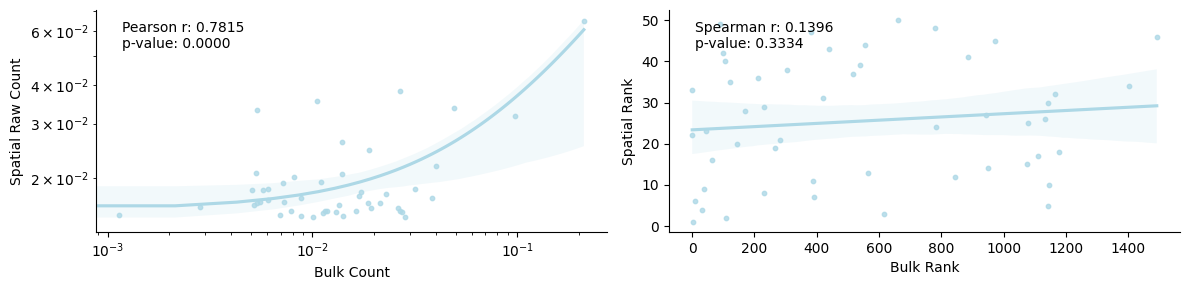

In [243]:
draw_df = pd.concat([order_bulk, order_cnt], axis=1).fillna(0).sort_values('MIDCount', ascending=False).head(50)
# 假设 draw_df 已经创建并处理
draw_df.columns = ['RNA-B304', 'Bulk rank', 'MIDCount', 'Spatial rank']
draw_df.MIDCount = draw_df.MIDCount / draw_df.MIDCount.sum()
draw_df['RNA-B304'] = draw_df['RNA-B304'] / draw_df['RNA-B304'].sum()

# 创建子图
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

# 图1：绘制 RNA-B304 vs MIDCount 的散点图，并拟合线性曲线
sns.regplot(data=draw_df, x='RNA-B304', y='MIDCount', scatter_kws={'color': 'lightblue', 's': 10}, line_kws={'color': 'lightblue'}, ax=ax[0])
sns.despine(ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_xscale('log')

# 计算 Pearson 相关系数及其显著性 p 值
r_value1, p_value1 = pearsonr(draw_df['RNA-B304'], draw_df['MIDCount'])

# 在图1上标注 Pearson 相关系数和显著性
ax[0].text(0.05, 0.95, f'Pearson r: {r_value1:.4f}\np-value: {p_value1:.4f}', 
           transform=ax[0].transAxes, ha='left', va='top', fontsize=10)

# 设置坐标轴标签
ax[0].set_xlabel('Bulk Count')
ax[0].set_ylabel('Spatial Raw Count')

# 图2：绘制 Bulk rank vs Spatial rank 的散点图，并拟合线性曲线
sns.regplot(data=draw_df, x='Bulk rank', y='Spatial rank', scatter_kws={'color': 'lightblue', 's': 10}, line_kws={'color': 'lightblue'}, ax=ax[1])
sns.despine(ax=ax[1])

# 计算第二个图的 Pearson 相关系数及其显著性 p 值
r_value2, p_value2 = spearmanr(draw_df['Bulk rank'], draw_df['Spatial rank'])

# 在图2上标注 Pearson 相关系数和显著性
ax[1].text(0.05, 0.95, f'Spearman r: {r_value2:.4f}\np-value: {p_value2:.4f}', 
           transform=ax[1].transAxes, ha='left', va='top', fontsize=10)

# 设置坐标轴标签
ax[1].set_xlabel('Bulk Rank')
ax[1].set_ylabel('Spatial Rank')

# 显示图形
plt.tight_layout()
plt.show()

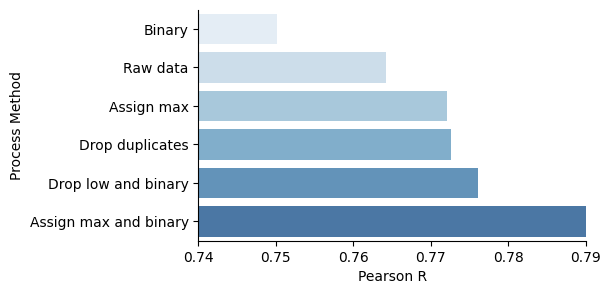

In [23]:
r_dict = {}
plt.figure(figsize=(5, 3))
for r in pear:
    r_dict[r] = pear[r][0]
df = pd.DataFrame(r_dict, index=['r']).T.reset_index().sort_values(by='r')
sns.barplot(df, y='index', x='r', hue='index', palette='Blues', alpha=0.8)
sns.despine()
plt.xlim([0.74, 0.79])
plt.xlabel('Pearson R')
plt.ylabel('Process Method')

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/pearson_method.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [45]:
file_path = '/home/wpy/stereoseq/in_vivo_tumor/B03502E5/out_/B03502E5-1/04.output/B03502E5.gem'
df = pd.read_csv(file_path, header=0, index_col=0, sep='\t', comment='#')

In [27]:
# nothing to do
order_cnt = df.reset_index().groupby(by='geneID')[['MIDCount']].sum().sort_values(by='MIDCount', ascending=False)

order_bulk['rank'] = list(range(1, len(order_bulk.index) + 1))
order_cnt['rank'] = list(range(1, len(order_cnt.index) + 1))

t_df = pd.concat([order_bulk, order_cnt], axis=1).fillna(0).sort_values('MIDCount', ascending=False).head(50)
pear['Mismatch = 0'] = pearsonr(t_df['RNA-B304'], t_df['MIDCount'])

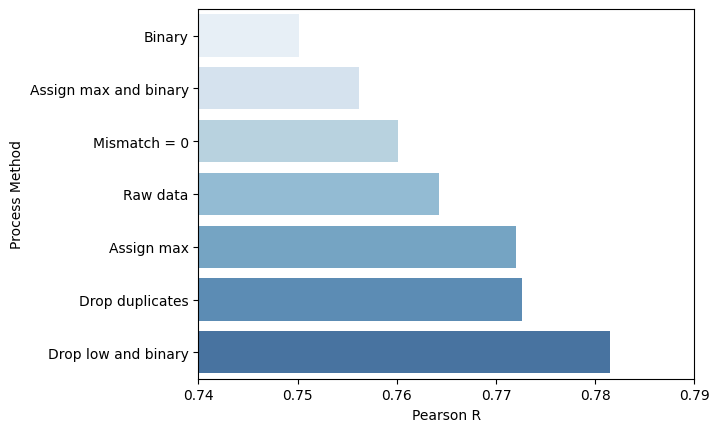

In [28]:
r_dict = {}
for r in pear:
    r_dict[r] = pear[r][0]
df = pd.DataFrame(r_dict, index=['r']).T.reset_index().sort_values(by='r')
sns.barplot(df, y='index', x='r', hue='index', palette='Blues', alpha=0.8)
plt.xlim([0.74, 0.79])
plt.xlabel('Pearson R')
plt.ylabel('Process Method')
plt.show()

# Check with T marker

In [1]:
import scanpy as sc
cdata = sc.read_h5ad('/home/wpy/stereoseq/20240802-Tumor/RNA/B03502E5.combined.bin100.h5')
fdata = cdata[:, ~cdata.var_names.str.startswith('sg')].copy()
fdata

AnnData object with n_obs × n_vars = 15551 × 22215
    obsm: 'spatial'

In [21]:
# assgin without filter
df.reset_index().groupby(['x', 'y']).max().reset_index().set_index('geneID').to_csv('~/stereoseq/20240802-Tumor/filter_gem/assign_without_filter.gem', sep='\t')

In [22]:
# filter without assign
out_df = df.loc[df.MIDCount > 1, :]
out_df.to_csv('~/stereoseq/20240802-Tumor/filter_gem/filter_without_assign.gem', sep='\t')

In [27]:
# assgin and binary
out_df = df.reset_index().groupby(['x', 'y']).max().reset_index().set_index('geneID')
out_df.MIDCount = 1
out_df.to_csv('~/stereoseq/20240802-Tumor/filter_gem/assign_without_filter_binary.gem', sep='\t')

In [28]:
# filter and binary
out_df = df.loc[df.MIDCount > 1, :]
out_df.MIDCount = 1
out_df.to_csv('~/stereoseq/20240802-Tumor/filter_gem/filter_without_assign_binary.gem', sep='\t')

/tmp/ipykernel_17421/2037190172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df.MIDCount = 1


In [30]:
# filter and assign and binary
out_df = df.reset_index().groupby(['x', 'y']).max().reset_index().set_index('geneID')
out_df = out_df.loc[out_df.MIDCount > 1, :]
out_df.MIDCount = 1
out_df.to_csv('~/stereoseq/20240802-Tumor/filter_gem/filter_assign_binary.gem', sep='\t')

In [2]:
import numpy as np
mag_genes = ["Mki67", "Epcam", "Top2a", "Ascl2", "Cbx3", "Hsp90ab1", "Zfas1", "Pabpc1", "Gtf3a", "Nap1l1", "Tgfbi", "Ifitm3", "Hspd1", "Nono", "Hsph1", "Nkd1", "Ly6e", "C6orf48", "Ssb", "Rsl1d1", "Dpep1", "Dkc1", "Bmp4", "Gng4", "Cpne1", "Zdhhc9", "Dars", "Scd", "Myc", "Phlda1", "Dach1", "Cldn1", "Krt23"]
mag_genes = np.intersect1d(mag_genes, fdata.var_names)

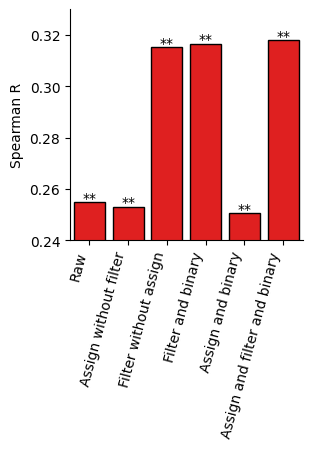

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from bin import load_bgi as ld

# Prepare the spatial DataFrame
fdf = pd.DataFrame({
    'x': fdata.obsm['spatial'][:, 0] // 100,
    'y': fdata.obsm['spatial'][:, 1] // 100,
    't_cnt': np.array(fdata[:, mag_genes].X.sum(axis=1)).T[0]
})
fdf = fdf.groupby(['x', 'y']).sum()

# Initialize the results dictionary
r_dict = {}

# Define the GEM file paths and their corresponding labels
gem_files = [
    ('/home/wpy/stereoseq/20240802-Tumor/RNA/B03502E5.gem', 'Raw'),
    ('~/stereoseq/20240802-Tumor/filter_gem/assign_without_filter.gem', 'Assign without filter'),
    ('~/stereoseq/20240802-Tumor/filter_gem/filter_without_assign.gem', 'Filter without assign'),
    ('~/stereoseq/20240802-Tumor/filter_gem/filter_without_assign_binary.gem', 'Filter and binary'),
    ('~/stereoseq/20240802-Tumor/filter_gem/assign_without_filter_binary.gem', 'Assign and binary'),
    ('~/stereoseq/20240802-Tumor/filter_gem/filter_assign_binary.gem', 'Assign and filter and binary')
]

# Loop through each GEM file, load data, and calculate Spearman correlation
for gem_path, label in gem_files:
    gdata = ld.load_bin(gem_path, bin_size=100, library_id='spatial')
    
    # Create the guide DataFrame
    gdf = pd.DataFrame({
        'x': gdata.obsm['spatial'][:, 0] // 100,
        'y': gdata.obsm['spatial'][:, 1] // 100,
        'guide_cnt': np.array(gdata.X.sum(axis=1)).T[0]
    })
    gdf = gdf.groupby(['x', 'y']).sum()

    # Combine guide and target counts
    cdf = pd.concat([gdf, fdf], axis=1, join='outer').fillna(0)
    # cdf = cdf[cdf.guide_cnt > 0]
    
    # Calculate Spearman correlation
    r_dict[label] = [spearmanr(cdf.guide_cnt, cdf.t_cnt)[0], spearmanr(cdf.guide_cnt, cdf.t_cnt)[1]]

# Output the results
plt.figure(figsize=(3, 3))
pdf = pd.DataFrame(r_dict, index=['pearsonr', 'pvalue']).T
pdf.pearsonr = pdf.pearsonr.abs()
# pdf.pearsonr = np.sign(pdf.pearsonr) * np.log2(pdf.pearsonr.abs())
sns.barplot(pdf, x=pdf.index, y='pearsonr', edgecolor='black', color='red')
for i in range(6):
    plt.text(x=i, y=pdf.iloc[i, 0], s=(lambda x: '**' if x < 0.01 else ('*' if x < 0.05 else ''))(pdf.iloc[i, 1]), ha='center', size=10)
plt.xlabel('')
plt.ylabel('Spearman R')
plt.xticks(rotation=75, ha='right')
plt.ylim([0.24, 0.33])
# plt.gca().set_yscale('log')
sns.despine()

# plt.rcParams['pdf.fonttype']=42
# plt.savefig("./plots/spearman_method.pdf", format="pdf", bbox_inches='tight')


In [169]:
import numpy as np
import libpysal
import esda
from libpysal.weights import DistanceBand
import geopandas as gpd
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

r_dict = {}
# Loop through each GEM file, load data, and calculate Spearman correlation
for gem_path, label in gem_files:
    gdata = ld.load_bin(gem_path, bin_size=100, library_id='spatial')
    
    # Create the guide DataFrame
    gdf = pd.DataFrame({
        'x': gdata.obsm['spatial'][:, 0] // 100,
        'y': gdata.obsm['spatial'][:, 1] // 100,
        'guide_cnt': np.array(gdata.X.sum(axis=1)).T[0]
    })
    gdf = gdf.groupby(['x', 'y']).sum()

    # Combine guide and target counts
    cdf = pd.concat([gdf, fdf], axis=1, join='outer').fillna(0)
    # cdf = cdf[cdf.guide_cnt > 0]
    
    # Extract spatial coordinates and gene expression data
    spatial_coords = np.array([cdf.index.get_level_values(0).tolist(), cdf.index.get_level_values(1).tolist()]).T
    gene_b_expression = np.array(cdf.guide_cnt.tolist())
    gene_a_expression = np.array(cdf.t_cnt.tolist())

    # Standardize the gene expression data
    scaler = StandardScaler()
    gene_a_expression = scaler.fit_transform(gene_a_expression.reshape(-1, 1)).flatten()
    gene_b_expression = scaler.fit_transform(gene_b_expression.reshape(-1, 1)).flatten()

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame({
        'geometry': gpd.points_from_xy(spatial_coords[:, 0], spatial_coords[:, 1]),
        'gene_a': gene_a_expression,
        'gene_b': gene_b_expression
    })

    # Create a spatial weights matrix using distance band
    dist_weights = DistanceBand.from_dataframe(gdf, threshold=1.0, binary=True, alpha=-1.0, silence_warnings=True)

    # Calculate global bivariate Moran's I
    bi_moran = esda.moran.Moran_BV(gdf['gene_a'], gdf['gene_b'], dist_weights)
    r_dict[label] = bi_moran.I
r_dict

{'Raw': -0.014019250883383322,
 'Assign without filter': -0.03748045218811136,
 'Filter without assign': -0.01131108566384587,
 'Filter and binary': -0.011874801849105915,
 'Assign and binary': -0.0604546091064787,
 'Assign and filter and binary': -0.049528401327908346}

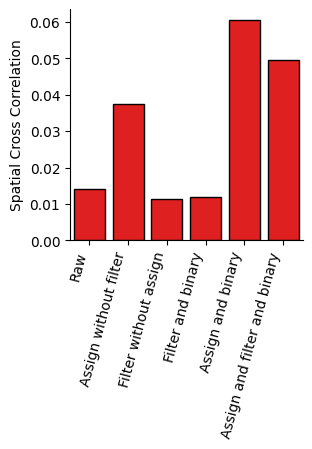

In [173]:
# Output the results
plt.figure(figsize=(3, 3))
pdf = pd.DataFrame(r_dict, index=['pearsonr']).T
pdf.pearsonr = pdf.pearsonr.abs()
# pdf.pearsonr = np.sign(pdf.pearsonr) * np.log2(pdf.pearsonr.abs())
sns.barplot(pdf, x=pdf.index, y='pearsonr', edgecolor='black', color='red')
plt.xlabel('')
plt.ylabel('Spatial Cross Correlation')
plt.xticks(rotation=75, ha='right')
# plt.gca().set_yscale('log')
sns.despine()

plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/scc_method.pdf", format="pdf", bbox_inches='tight')

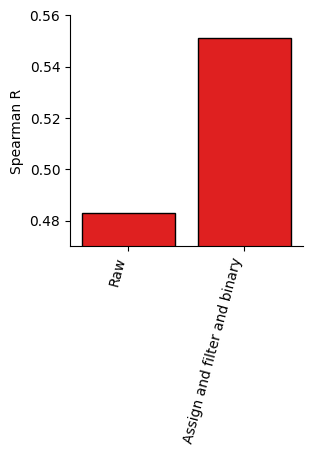

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from bin import load_bgi as ld

# Prepare the spatial DataFrame
fdf = pd.DataFrame({
    'x': fdata.obsm['spatial'][:, 0] // 100,
    'y': fdata.obsm['spatial'][:, 1] // 100,
    't_cnt': np.array(fdata[:, mag_genes].X.sum(axis=1)).T[0]
})
fdf = fdf.groupby(['x', 'y']).sum()

# Initialize the results dictionary
r_dict = {}

# Define the GEM file paths and their corresponding labels
gem_files = [
    ('/home/wpy/stereoseq/20240802-Tumor/RNA/B03502E5.gem', 'Raw'),
    # ('~/stereoseq/20240802-Tumor/filter_gem/assign_without_filter.gem', 'Assign without filter'),
    # ('~/stereoseq/20240802-Tumor/filter_gem/filter_without_assign.gem', 'Filter without assign'),
    # ('~/stereoseq/20240802-Tumor/filter_gem/filter_without_assign_binary.gem', 'Filter and binary'),
    # ('~/stereoseq/20240802-Tumor/filter_gem/assign_without_filter_binary.gem', 'Assign and binary'),
    ('~/stereoseq/20240802-Tumor/filter_gem/filter_assign_binary.gem', 'Assign and filter and binary')
]

# Loop through each GEM file, load data, and calculate Spearman correlation
for gem_path, label in gem_files:
    gdata = ld.load_bin(gem_path, bin_size=100, library_id='spatial')
    
    # Create the guide DataFrame
    gdf = pd.DataFrame({
        'x': gdata.obsm['spatial'][:, 0] // 100,
        'y': gdata.obsm['spatial'][:, 1] // 100,
        'guide_cnt': np.array(gdata.X.sum(axis=1)).T[0]
    })
    gdf = gdf.groupby(['x', 'y']).sum()

    # Combine guide and target counts
    cdf = pd.concat([gdf, fdf], axis=1, join='outer').fillna(0)
    # cdf = cdf[cdf.guide_cnt > 0]
    
    # Calculate Spearman correlation
    # r_dict[label] = [spearmanr(cdf.guide_cnt, cdf.t_cnt)[0], spearmanr(cdf.guide_cnt, cdf.t_cnt)[1]]
    overlap = np.sum((cdf.guide_cnt > 0) & (cdf.t_cnt > 0)) / np.sum(cdf.guide_cnt > 0)
    r_dict[label] = overlap

# Output the results
plt.figure(figsize=(3, 3))
pdf = pd.DataFrame(r_dict, index=['pearsonr', 'pvalue']).T
pdf.pearsonr = pdf.pearsonr.abs()
# pdf.pearsonr = np.sign(pdf.pearsonr) * np.log2(pdf.pearsonr.abs())
sns.barplot(pdf, x=pdf.index, y='pearsonr', edgecolor='black', color='red')
for i in range(2):
    plt.text(x=i, y=pdf.iloc[i, 0], s=(lambda x: '**' if x < 0.01 else ('*' if x < 0.05 else ''))(pdf.iloc[i, 1]), ha='center', size=10)
plt.xlabel('')
plt.ylabel('Spearman R')
plt.xticks(rotation=75, ha='right')
plt.ylim([0.47, 0.56])
# plt.gca().set_yscale('log')
sns.despine()

# plt.rcParams['pdf.fonttype']=42
# plt.savefig("./plots/spearman_method.pdf", format="pdf", bbox_inches='tight')


# Check Plot

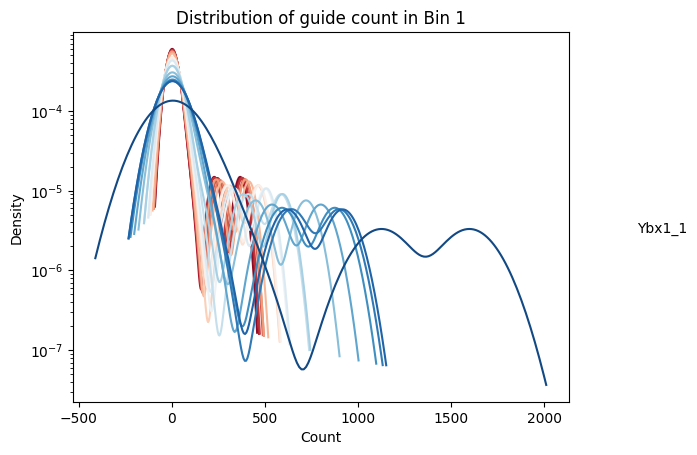

In [46]:
import seaborn as sns
pdf = df.groupby('geneID')['MIDCount'].value_counts().unstack().fillna(0)
pdf['sum'] = pdf.sum(axis=1)
pdf.sort_values(by='sum', inplace=True, ascending=False)
pdf = pdf.iloc[:20]
sns.kdeplot(pdf.T, fill=False, palette='RdBu_r', legend=False)
plt.text(2500, 3e-6, 'Ybx1_1')
plt.xlabel('Count')
plt.title('Distribution of guide count in Bin 1')
plt.gca().set_yscale('log')

Text(0.5, 1.0, 'Count Distribution of bin 1 across sample')

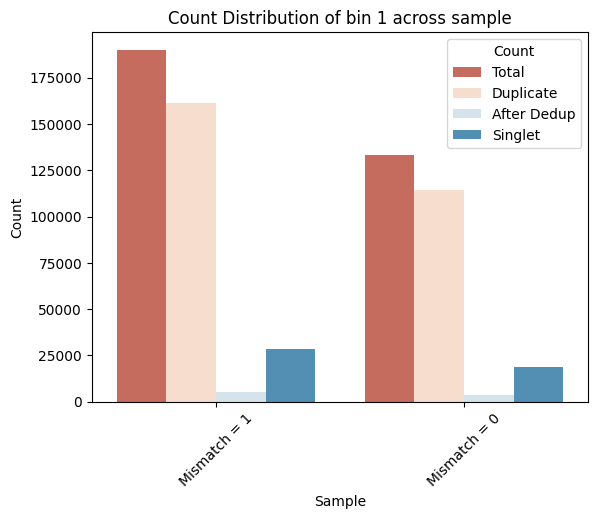

In [55]:
pdf = pd.DataFrame(columns=['Total', 'Duplicate', 'After Dedup', 'Singlet'])
for sample in ['/home/wpy/stereoseq/in_vivo_tumor/B03502E5/out/B03502E5-1/04.output/B03502E5', 
    "/home/wpy/stereoseq/in_vivo_tumor/B03502E5/out_/B03502E5-1/04.output/B03502E5"]:
    file_path = sample
    guide_df = pd.read_csv(file_path + '.gem', header=0, index_col=0, sep='\t', comment='#')
    cdf = pd.DataFrame({
        'Total': guide_df.shape[0],
        'After Dedup': guide_df[guide_df.duplicated(subset=['x', 'y'], keep=False)].drop_duplicates(subset=['x', 'y']).shape[0],
        'Singlet': guide_df.drop_duplicates(subset=['x', 'y']).shape[0],
    }, index=[sample])
    cdf['Duplicate'] = cdf['Total'] - cdf['Singlet']
    pdf = pd.concat([pdf, cdf])
pdf = pdf.T.melt()
pdf['Count'] = ['Total', 'Duplicate', 'After Dedup', 'Singlet'] * 2
sns.barplot(pdf, x='variable', y='value', hue='Count', palette='RdBu')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Sample')
plt.xticks([0, 1], ['Mismatch = 1', 'Mismatch = 0'])
plt.title('Count Distribution of bin 1 across sample')

# T9040

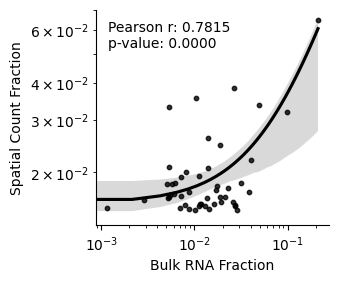

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.neighbors import KernelDensity
from mpl_toolkits.axes_grid1 import make_axes_locatable

draw_df = pd.concat([order_bulk, order_cnt], axis=1).fillna(0).sort_values('MIDCount', ascending=False).head(50)
# 假设 draw_df 已经创建并处理
draw_df.columns = ['RNA-B304', 'Bulk rank', 'MIDCount', 'Spatial rank']
draw_df.MIDCount = draw_df.MIDCount / draw_df.MIDCount.sum()
draw_df['RNA-B304'] = draw_df['RNA-B304'] / draw_df['RNA-B304'].sum()

# 创建子图
fig, ax = plt.subplots(1, 1, figsize=(3, 2.8))

# 图1：绘制 RNA-B304 vs MIDCount 的散点图，并拟合线性曲线
sns.regplot(data=draw_df, x='RNA-B304', y='MIDCount', scatter_kws={'color': 'black', 's': 10}, line_kws={'color': 'black'}, ax=ax)
sns.despine(ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')

# 计算 Pearson 相关系数及其显著性 p 值
r_value1, p_value1 = pearsonr(draw_df['RNA-B304'], draw_df['MIDCount'])

# 在图1上标注 Pearson 相关系数和显著性
ax.text(0.05, 0.95, f'Pearson r: {r_value1:.4f}\np-value: {p_value1:.4f}', 
           transform=ax.transAxes, ha='left', va='top', fontsize=10)

# 美化图形，移除坐标轴边缘线
sns.despine()

# # 创建横向colorbar并设置位置到右下角
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("bottom", size=0.1, pad=0.5)  # 控制colorbar位置（底部）
# cbar = fig.colorbar(sc, cax=cax, orientation='horizontal')  # 设置为横向colorbar
# cbar.set_label('Density')  # 添加Density标签

# # 去除colorbar的外边框（如果没有ax.get_frame，直接忽略）
# cbar.outline.set_visible(False)

ax.set_ylabel('Spatial Count Fraction')
ax.set_xlabel('Bulk RNA Fraction')

# 显示图形
plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/DNA Bulk-Spatial.pdf", format="pdf", bbox_inches='tight')
plt.show()

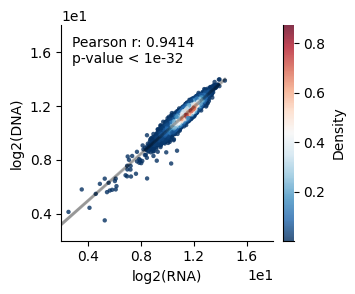

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.ticker import MaxNLocator
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 读取数据
cnt_df = pd.read_csv('T_9040_DNA_RNA.count.normalized.txt', sep='\t', header=0)

fig, ax = plt.subplots(figsize=(3, 2.8))

# 绘制Pearson相关系数
cnt_df = cnt_df[(cnt_df.DNA > 0) & (cnt_df.RNA > 0)]
cnt_df.DNA = np.log2(cnt_df.DNA)
cnt_df.RNA = np.log2(cnt_df.RNA)
r = pearsonr(cnt_df['DNA'], cnt_df['RNA'])

# 计算点的密度
x = cnt_df['DNA'].values
y = cnt_df['RNA'].values
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# 创建散点图，点的颜色表示密度
scatter = ax.scatter(y, x, c=z, s=10, edgecolor='none', alpha=0.8, cmap='RdBu_r')
# 创建垂直colorbar并设置位置到右侧中部
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 控制colorbar位置（右侧）
cbar = fig.colorbar(scatter, cax=cax, orientation='vertical')  # 设置为垂直colorbar
cbar.set_label('Density')  # 添加Density标签

# 去除colorbar的外边框
cbar.outline.set_visible(False)

# 添加拟合曲线
sns.regplot(x='RNA', y='DNA', data=cnt_df, scatter=False, ax=ax, color='black', line_kws={"alpha": 0.3})

# 设置坐标轴范围（根据需要可以设置）
ax.set_ylim([2, 18])
ax.set_xlim([2, 18])

# 在图1上标注 Pearson 相关系数和显著性
ax.text(0.05, 0.95, f'Pearson r: {r[0]:.4f}\np-value < 1e{-np.log10(r[1]) if r[1] > 0 else -32}', 
           transform=ax.transAxes, ha='left', va='top', fontsize=10)

# 设置坐标轴标签
ax.set_ylabel('log2(DNA)')
ax.set_xlabel('log2(RNA)')

# 设置科学计数法显示
ax.ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))

# 设置坐标轴的刻度间距
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # X轴最多显示5个刻度
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Y轴最多显示5个刻度

# 美化图形，移除坐标轴边缘线
sns.despine()

# 显示图形
plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/RNA-DNA Bulk.pdf", format="pdf", bbox_inches='tight')
plt.show()

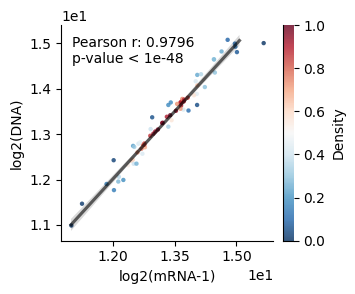

In [10]:
# 读取数据
cnt_df = pd.read_csv('HD-Stereo-correlation.count_normalized_replicate_1.txt', sep='\t', header=0)

fig, ax = plt.subplots(figsize=(3, 2.8))

# 绘制Pearson相关系数
cnt_df.columns = ['sgRNA', 'Gene', 'DNA', 'RNA', 'HD']
cnt_df.DNA = np.log2(cnt_df.DNA + 1e-39)
cnt_df.RNA = np.log2(cnt_df.RNA + 1e-39)
r = pearsonr(cnt_df['DNA'], cnt_df['RNA'])

# 计算点的密度
x = cnt_df['DNA'].values
y = cnt_df['RNA'].values
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

z = (z - np.min(z)) / (np.max(z) - np.min(z))  # 将z归一化到0到1之间


# 创建散点图，点的颜色表示密度
scatter = ax.scatter(x, y, c=z, s=10, edgecolor='none', alpha=0.8, cmap='RdBu_r')
# 创建垂直colorbar并设置位置到右侧中部
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 控制colorbar位置（右侧）
cbar = fig.colorbar(scatter, cax=cax, orientation='vertical')  # 设置为垂直colorbar
cbar.set_label('Density')  # 添加Density标签

# 去除colorbar的外边框
cbar.outline.set_visible(False)

# 添加拟合曲线
sns.regplot(x='RNA', y='DNA', data=cnt_df, scatter=False, ax=ax, color='black', line_kws={"alpha": 0.6})

# 设置坐标轴范围（根据需要可以设置）
# ax.set_ylim([2, 18])
# ax.set_xlim([2, 18])

# 在图1上标注 Pearson 相关系数和显著性
ax.text(0.05, 0.95, f'Pearson r: {r[0]:.4f}\np-value < 1e{(np.log10(r[1]) if r[1] > 0 else -32):.0f}', 
           transform=ax.transAxes, ha='left', va='top', fontsize=10)

# 设置坐标轴标签
ax.set_ylabel('log2(DNA)')
ax.set_xlabel('log2(mRNA-1)')

# 设置科学计数法显示
ax.ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))

# 设置坐标轴的刻度间距
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # X轴最多显示5个刻度
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Y轴最多显示5个刻度

# 美化图形，移除坐标轴边缘线
sns.despine()

# 显示图形
plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/DNA-Stereo.pdf", format="pdf", bbox_inches='tight')
plt.show()

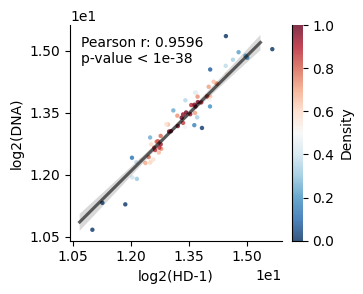

In [9]:
# 读取数据
cnt_df = pd.read_csv('HD-Stereo-correlation.count_normalized_replicate_1.txt', sep='\t', header=0)

fig, ax = plt.subplots(figsize=(3, 2.8))

# 绘制Pearson相关系数
cnt_df.columns = ['sgRNA', 'Gene', 'DNA', 'RNA', 'HD']
cnt_df.DNA = np.log2(cnt_df.DNA + 1e-39)
cnt_df.HD = np.log2(cnt_df.HD + 1e-39)
r = pearsonr(cnt_df['DNA'], cnt_df['HD'])

# 计算点的密度
x = cnt_df['DNA'].values
y = cnt_df['HD'].values
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

z = (z - np.min(z)) / (np.max(z) - np.min(z))  # 将z归一化到0到1之间

# 创建散点图，点的颜色表示密度
scatter = ax.scatter(x, y, c=z, s=10, edgecolor='none', alpha=0.8, cmap='RdBu_r')
# 创建垂直colorbar并设置位置到右侧中部
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 控制colorbar位置（右侧）
cbar = fig.colorbar(scatter, cax=cax, orientation='vertical')  # 设置为垂直colorbar
cbar.set_label('Density')  # 添加Density标签

# 去除colorbar的外边框
cbar.outline.set_visible(False)

# 添加拟合曲线
sns.regplot(x='HD', y='DNA', data=cnt_df, scatter=False, ax=ax, color='black', line_kws={"alpha": 0.6})

# 设置坐标轴范围（根据需要可以设置）
# ax.set_ylim([2, 18])
# ax.set_xlim([2, 18])

# 在图1上标注 Pearson 相关系数和显著性
ax.text(0.05, 0.95, f'Pearson r: {r[0]:.4f}\np-value < 1e{(np.log10(r[1]) if r[1] > 0 else -32):.0f}', 
           transform=ax.transAxes, ha='left', va='top', fontsize=10)

# 设置坐标轴标签
ax.set_ylabel('log2(DNA)')
ax.set_xlabel('log2(HD-1)')

# 设置科学计数法显示
ax.ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))

# 设置坐标轴的刻度间距
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # X轴最多显示5个刻度
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Y轴最多显示5个刻度

# 美化图形，移除坐标轴边缘线
sns.despine()

# 显示图形
plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/DNA-HD.pdf", format="pdf", bbox_inches='tight')
plt.show()

(1.0, 18.0)

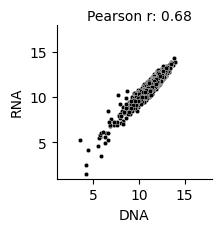

In [206]:
cnt_df = pd.read_csv('T_9040_DNA_RNA.count.normalized.txt', sep='\t', header=0)
plt.figure(figsize=(2, 2))
cnt_df.DNA = np.log2(cnt_df.DNA + 1e-39)
cnt_df.RNA = np.log2(cnt_df.RNA + 1e-39)
sns.scatterplot(cnt_df, x='DNA', y='RNA', color='black', s=10, legend=False)
# sns.regplot(data=draw_df, x='RNA-B304', y='MIDCount', scatter_kws={'color': 'lightblue', 's': 10}, line_kws={'color': 'lightblue'}, ax=ax[0])
sns.despine()

r = pearsonr(cnt_df.DNA, cnt_df.RNA)[0] 
plt.text(x=10, y=18.5, s=f'Pearson r: {r:.2f}', ha='center')

plt.gca().set_ylim([1, 18])
plt.gca().set_xlim([1, 18])

# plt.gca().set_yscale('log')
# plt.gca().set_xscale('log')

In [138]:
cnt_df = pd.read_csv('T_9040_DNA_RNA.count.normalized.txt', sep='\t', header=0)
cnt_df.set_index('Gene', inplace=True)
cnt_df = pd.DataFrame(cnt_df.groupby('Gene')['RNA'].sum())
cnt_df

,RNA
Gene,
0610012G03Rik,11486.868395
1110004F10Rik,8131.338583
1500009L16Rik,13676.223579
1810009A15Rik,12058.844683
1810055G02Rik,16901.319609
...,...
Zscan26,16767.021122
Zscan30,16301.324212
Zscan5b,10054.029146


In [9]:
import scanpy as sc
from bin import load_bgi as ld
adata = ld.load_bin("/home/wpy/stereoseq/20231204-2ndData/05_tissueExtraction/RNA/RNA.tissue.combine.gem", bin_size=200, library_id='spatial')

In [12]:
gdata = adata[:, adata.var_names.str.startswith('sg')].copy()
gdata

AnnData object with n_obs × n_vars = 9702 × 38
    obsm: 'spatial'

In [87]:
spatial_df = pd.DataFrame(np.array(gdata.X.sum(axis=0)), columns=gdata.var_names.tolist(), index=['Count']).T
spatial_df.reset_index(inplace=True)
spatial_df['Gene'] = spatial_df['index'].str.split('_').str.get(0).str.lstrip('sg')
spatial_df = pd.DataFrame(spatial_df.groupby('Gene')['Count'].sum())
spatial_df.reset_index(inplace=False).set_index('Gene', inplace=True)
spatial_df.head()

,Count
Gene,
Abcc10,95
Acsl4,5
Cd74,12
Cd9,333
Cldnd1,6


In [139]:
mdf = spatial_df.join(cnt_df, on='Gene')

In [140]:
mdf

,Count,RNA
Gene,,
Abcc10,95,13693.614750
Acsl4,5,8028.923909
Cd74,12,9277.223511
Cd9,333,8540.031099
Cldnd1,6,15567.996505
Cnst,37,12185.413760
Cyfip2,520,17275.229783
Ddx5,2,13923.564676
Grwd1,20,10163.207052


In [143]:
pdf = mdf.sort_values('Count')
pdf['Spatial_rank'] = np.ceil(np.array(range(1, 39))).astype(int)
pdf = pdf.sort_values('RNA')
pdf['Bulk_rank'] = np.ceil(np.array(range(1, 39))).astype(int)
pdf

,Count,RNA,Spatial_rank,Bulk_rank
Gene,,,,
Zbtb1,16,7630.859331,22,1
Acsl4,5,8028.923909,13,2
Mfng,65,8205.734147,29,3
Slc35f2,12,8385.442913,17,4
Cd9,333,8540.031099,35,5
Stk17b,71,8582.542850,30,6
Cd74,12,9277.223511,18,7
Slc14a1,14,9512.004319,20,8
H2-M9,4,9868.523323,11,9


In [164]:
spearmanr(pdf.Count, pdf.RNA)

SignificanceResult(statistic=-0.07159372186741289, pvalue=0.669277779860705)

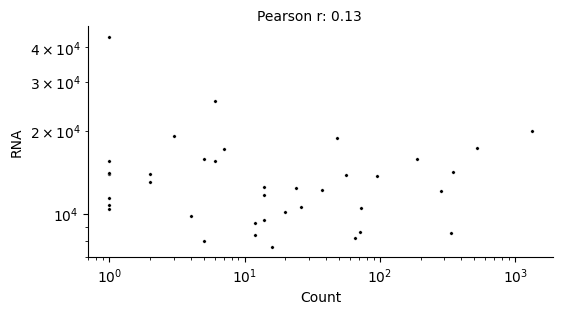

In [163]:
plt.figure(figsize=(6, 3))
sns.scatterplot(pdf, x='Count', y='RNA', s=6, color='black', legend=False)
sns.despine()

r = pearsonr(pdf.Count, pdf.RNA)[0]
plt.text(x=30, y=5e4, s=f'Pearson r: {r:.2f}', ha='center')

plt.gca().set_yscale('log')
plt.gca().set_xscale('log')

Text(18.5, 40, 'Spearman r: -0.07')

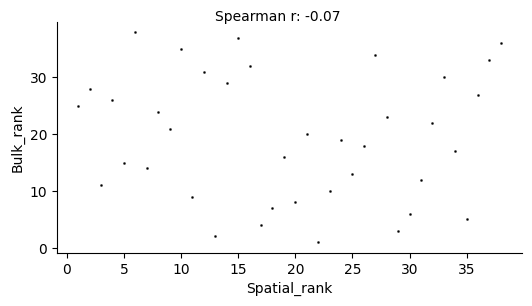

In [170]:
plt.figure(figsize=(6, 3))
sns.scatterplot(pdf, x='Spatial_rank', y='Bulk_rank', s=4, color='black', legend=False)
sns.despine()

r = spearmanr(pdf.Spatial_rank, pdf.Bulk_rank)[0]
plt.text(x=18.5, y=40, s=f'Spearman r: {r:.2f}', ha='center')